# Visual Inspection

# 1. Pre-Processing of Data
- to ensure the features work as intended


## 1.1 import the data

In [1]:
import df_manipulation_functions as dfmf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#read in the the flow and temp data
flow_temp_df = dfmf.create_flow_temp_df("Data/Temp/*.txt","Data/Flow/*.txt") 
#save the dataframe as pickle file
flow_temp_df.to_pickle("Data/flow_temp_df.pkl")
#read in the pickle file
flow_temp_df = pd.read_pickle("Data/flow_temp_df.pkl")
flow_temp_df.head()

Zeitstempel   Stationsname  Stationsnummer  Flow_Wert  Temp_Wert  \
0  1980-01-01 00:00:00  Porte du Scex            2009     82.533        3.7   
1  1980-01-02 00:00:00  Porte du Scex            2009    117.734        3.3   
2  1980-01-03 00:00:00  Porte du Scex            2009    144.834        3.4   
3  1980-01-04 00:00:00  Porte du Scex            2009    148.472        3.4   
4  1980-01-05 00:00:00  Porte du Scex            2009    112.333        3.4   

  Gewässer  
0    Rhône  
1    Rhône  
2    Rhône  
3    Rhône  
4    Rhône

## 1.2 Visual inspection of temp data

- plot two example stations to have a close look at two different curves
- plot all the stations in one plot to see the general trend of the data
- to see if there are any outliers
- to see if there are any stations that are not working properly

### 1.2.1 Plot one station 
- over different time periods (e.g three years, one year)
- make use of averaging over time 
- use average window function to get a smoother curve

In [3]:
# chose station 2019 and get the station data
example_station_number = 2019
Wert = 'Temp_Wert'
example_station_df = dfmf.get_station_df(example_station_number, flow_temp_df)
example_station_df.head()

Stationsnummer          Zeitstempel  Flow_Wert  Temp_Wert
44921            2019  1980-01-01 00:00:00     14.656        3.9
44922            2019  1980-01-02 00:00:00     22.752        3.4
44923            2019  1980-01-03 00:00:00     23.579        3.3
44924            2019  1980-01-04 00:00:00     25.064        3.4
44925            2019  1980-01-05 00:00:00     17.645        4.1

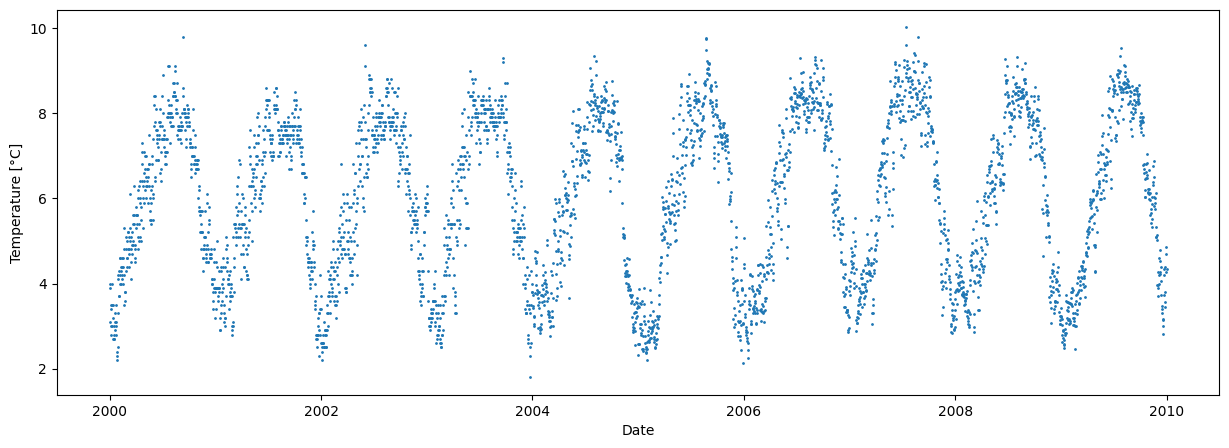

In [4]:
# get three years time period
example_station_3years_df = dfmf.get_time_period(example_station_number, '2000-01-01', '2010-01-01', flow_temp_df)

#plot the station data
plt.figure(figsize=(15,5))
plt.scatter(example_station_3years_df.index, example_station_3years_df[Wert], label=Wert, s=1)
station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == example_station_number]['Stationsname'].unique()[0]
plt.xlabel('Date')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
#plt.title(station_name + " " + str(example_station_number))

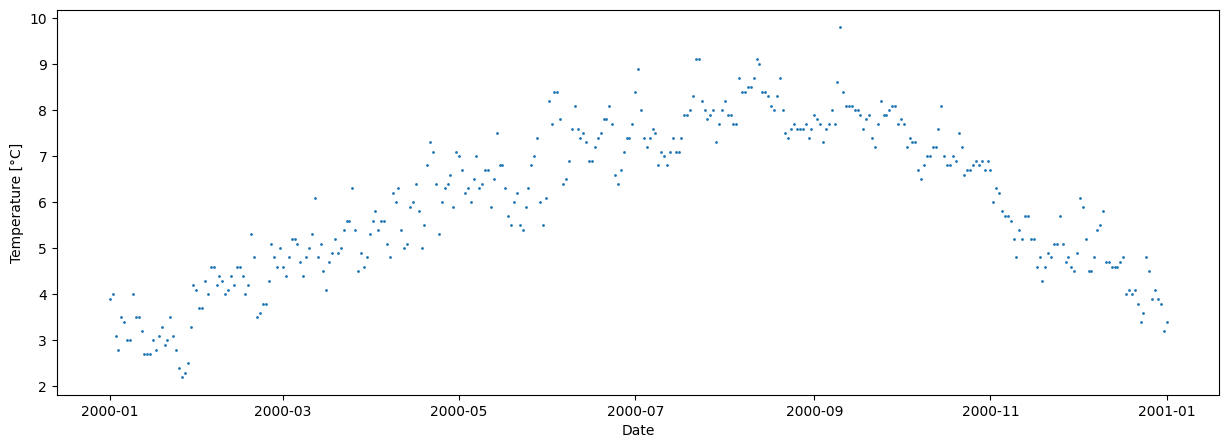

In [5]:

#get one year time period
example_station_1year_df = dfmf.get_time_period(example_station_number, '2000-01-01', '2001-01-01', flow_temp_df)

#plot the station data over one year
plt.figure(figsize=(15,5))
plt.scatter(example_station_1year_df.index, example_station_1year_df[Wert], label=Wert, s=1)
plt.xlabel('Date')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:  
    plt.ylabel('Temperature [°C]')

### Results
- The data is noisy due to the interval of the measurements
- we do averageing by day over the 40 years of data to get a clearer curve


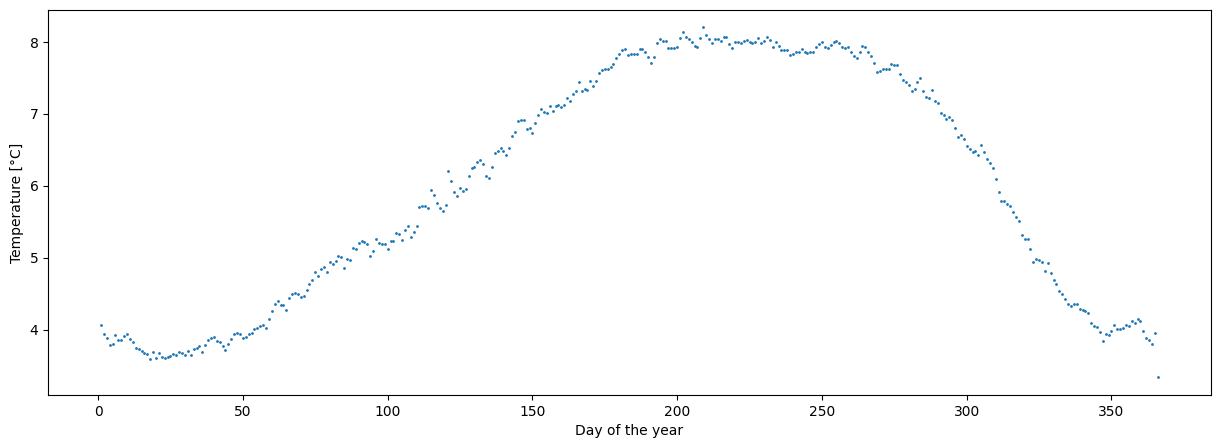

In [6]:
station_daily_averaged_df = dfmf.get_daily_averaged_df(example_station_number, flow_temp_df)
station_daily_averaged_df.head()

#plot the daily averaged data
plt.figure(figsize=(15,5))
plt.scatter(station_daily_averaged_df.index, station_daily_averaged_df[Wert], label=Wert, s=1)
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')

### Results
- The curve looks better but still a bit noisy
- All the little peaks do probably not resemble actual characteristics of the station
- this issue can be resolved by using a window averageing function


c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


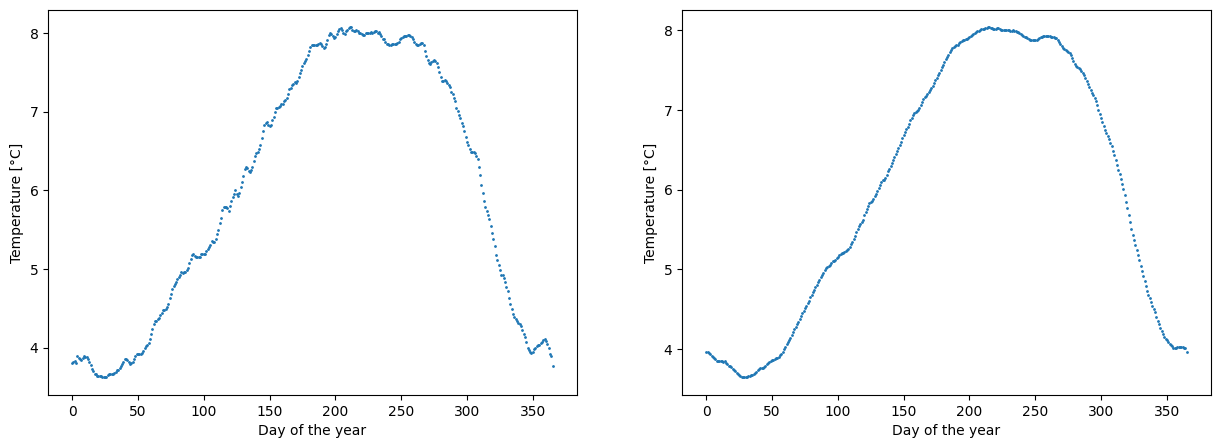

In [7]:
# get running mean of 5 days
window_length_long = 15
window_length_short = 5

station_daily_averaged_5days_mean_df = dfmf.get_running_mean_df(example_station_number, window_length_short, flow_temp_df, Wert)
station_daily_averaged_15days_mean_df = dfmf.get_running_mean_df(example_station_number, window_length_long, flow_temp_df, Wert)

#plot the daily averaged data for both window lengths in plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(station_daily_averaged_5days_mean_df.index, station_daily_averaged_5days_mean_df[Wert], label=Wert, s=1)
ax2.scatter(station_daily_averaged_15days_mean_df.index, station_daily_averaged_15days_mean_df[Wert], label=Wert, s = 1)
ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')

ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')

## Results
- The curve loooks like a continuing function and the now calculated features might give reasonable values


## 1.2.2 A Second station



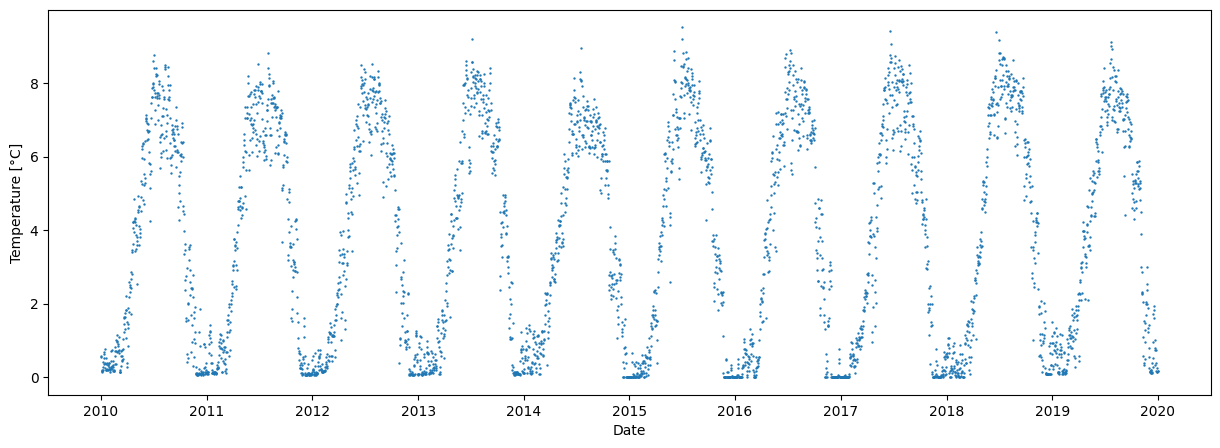

In [8]:
example_station_number2 = 2256
example_station_3years_df = dfmf.get_time_period(example_station_number2, '2010-01-01', '2020-01-01', flow_temp_df)

#plot the station data
plt.figure(figsize=(15,5))
plt.scatter(example_station_3years_df.index, example_station_3years_df[Wert], label=Wert, s=0.5)
station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == example_station_number2]['Stationsname'].unique()[0]
plt.xlabel('Date')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]') 
# plt.title(station_name + " " + str(example_station_number2))

Text(0, 0.5, 'Flow [m$^3$/s]')

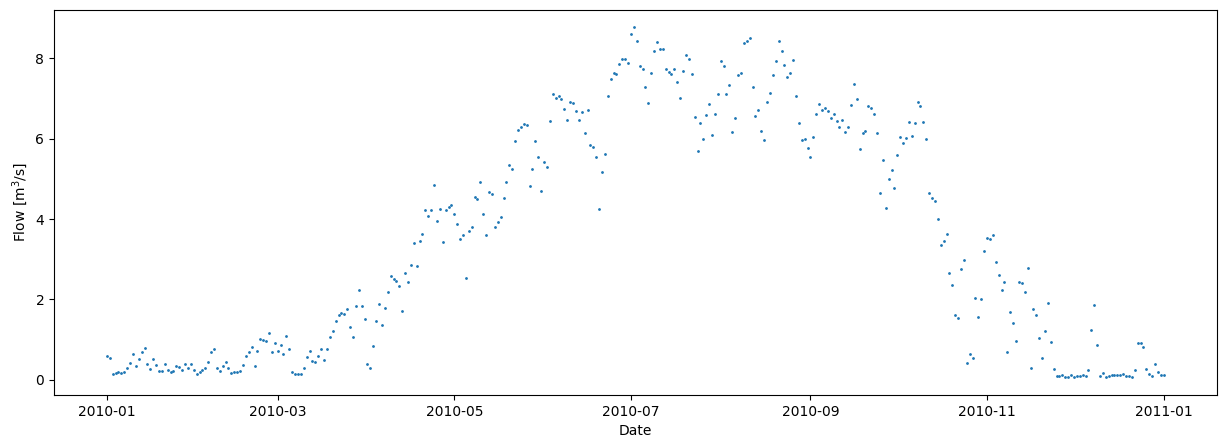

In [9]:
#get one year time period
example_station_1year_df = dfmf.get_time_period(example_station_number2, '2010-01-01', '2011-01-01', flow_temp_df)
#plot the station data over one year
plt.figure(figsize=(15,5))
plt.scatter(example_station_1year_df.index, example_station_1year_df[Wert], label=Wert, s=1)
plt.xlabel('Date')
plt.ylabel('Flow [m$^3$/s]')

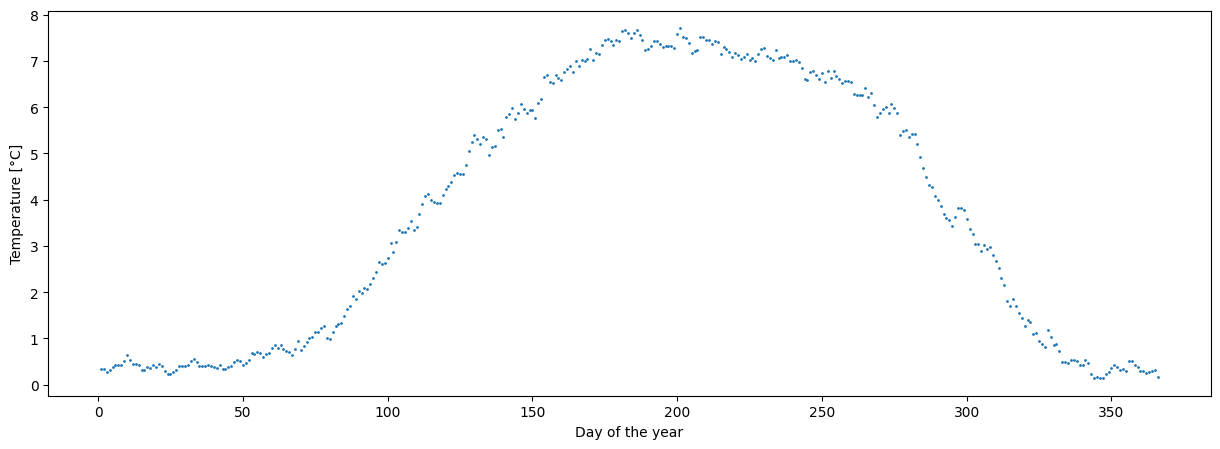

In [10]:
station_daily_averaged_df = dfmf.get_daily_averaged_df(example_station_number2, flow_temp_df)
station_daily_averaged_df.head()

#plot the daily averaged data
plt.figure(figsize=(15,5))
plt.scatter(station_daily_averaged_df.index, station_daily_averaged_df[Wert], label=Wert, s=1)
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')



c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


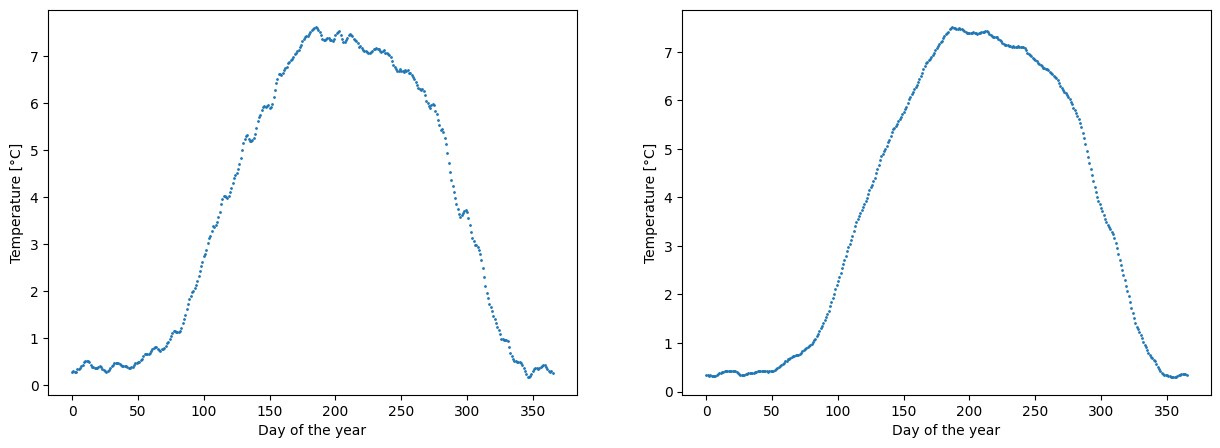

In [11]:
# get running mean of 5 days
window_length_long = 15
window_length_short = 5


station_daily_averaged_5days_mean_df = dfmf.get_running_mean_df(example_station_number2, window_length_short, flow_temp_df, Wert)
station_daily_averaged_15days_mean_df = dfmf.get_running_mean_df(example_station_number2, window_length_long, flow_temp_df, Wert)

#plot the daily averaged data for both window lengths in plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(station_daily_averaged_5days_mean_df.index, station_daily_averaged_5days_mean_df[Wert], label=Wert, s=1)
ax2.scatter(station_daily_averaged_15days_mean_df.index, station_daily_averaged_15days_mean_df[Wert], label=Wert, s=1)
ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')
ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')



## Results
- the curve looks still very noisy and it is difficult to say wether this actually resembles some behaviour

# 2. Analysis of all curves and deduction of features


## 2.1 Plot all Stations
- in an original scale
- in scale normalized to the maximum value of each station


c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

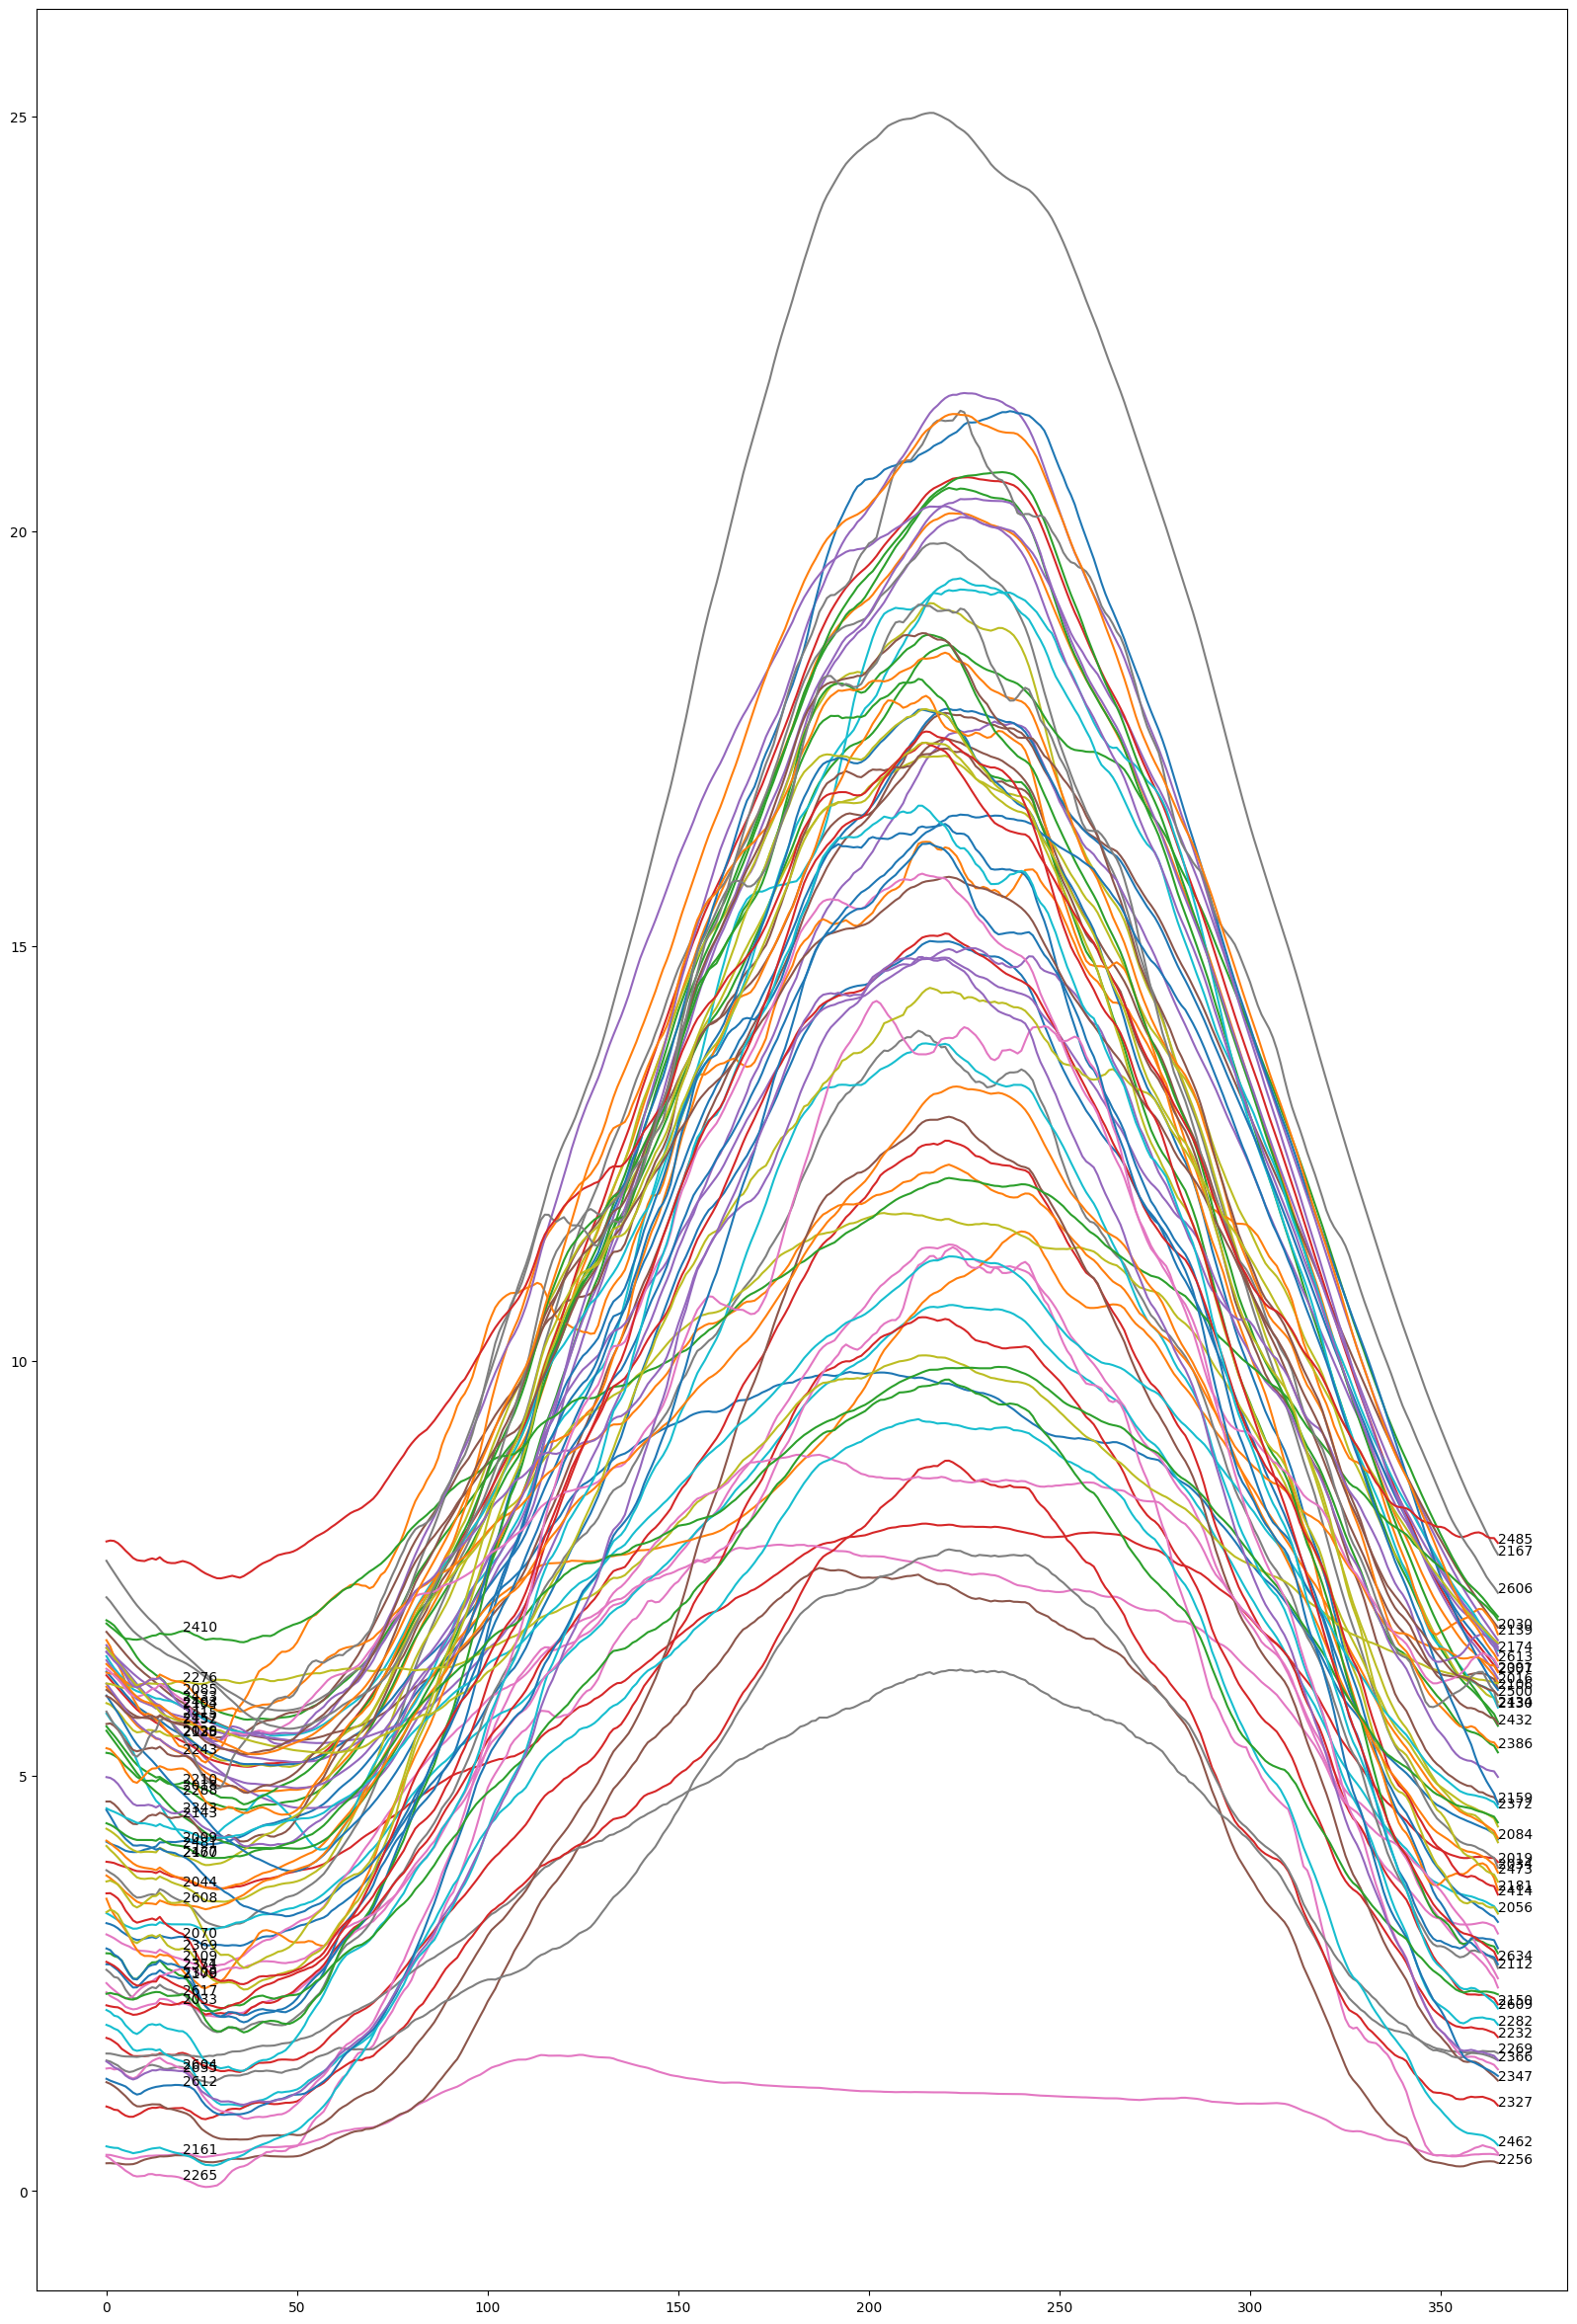

In [12]:
# plot all window function data of each station in one plot
window_length_long = 15

i = 20

plt.figure(figsize=(20,30))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
    plt.plot(station_df.index, station_df[Wert], label=station_number)
    
    plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    
   
    if(i == 20):
        i = 365
    else:
        i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
# plt.xlabel('Day of the year')
# if Wert == 'Flow_Wert':
#     plt.ylabel('Flow [m$^3$/s]')
# else:
#     plt.ylabel('Temperature [°C]')

    

# plt.figure(figsize=(20,50))
# for station_number in flow_temp_df['Stationsnummer'].unique():
#     station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, 'Temp_Wert')
#     plt.scatter(station_df.index, station_df['Temp_Wert'], label=station_number)

# #limit plot to positive values
# plt.ylim(0, 30)
# plt.show()



## Result 
- many of the curves look similar 
- distinguishable features could be 
    - number of maximas 
    - day of first maxima
    - day of crossing first fixed value, not relative to station average
    - day of minima
    - steepness of the curve 

## TODO
- peak detection from library
- steepness of curve from library
 

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

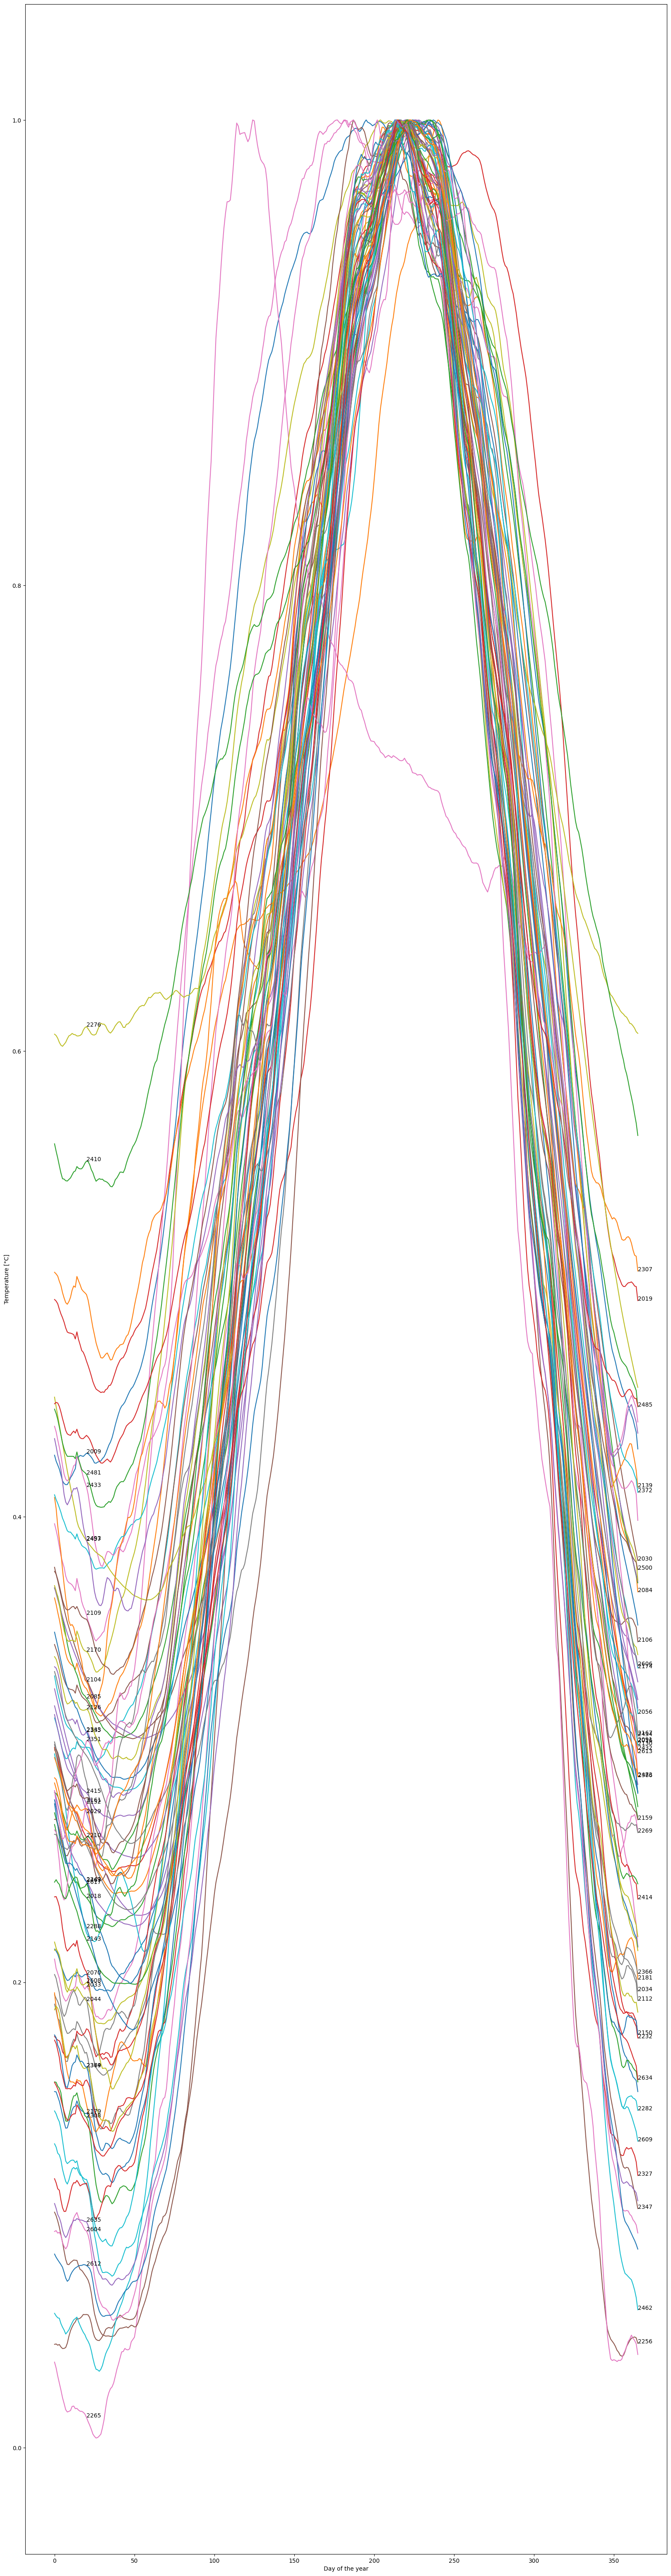

In [13]:
# plot all window function data of each station in one plot
import numpy as np
window_length_long = 15
i = 20
#plot the data normalized
plt.figure(figsize=(20,80))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.plot(station_df.index, station_df[Wert] / np.max(station_df[Wert]), label=station_number)
    plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]/np.max(station_df[Wert])))
    if(i == 20):
        i = 365
    else:
        i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
plt.show()

# plt.figure(figsize=(20,50))
# for station_number in flow_temp_df['Stationsnummer'].unique():
#     station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, 'Temp_Wert')
#     plt.scatter(station_df.index, station_df['Temp_Wert'], label=station_number)

# #limit plot to positive values
# plt.ylim(0, 30)
# plt.show()



## Results
- the temperature curves look more similar to each other than the flow curves
- the flow curves have a much higher variance
- expectaiton for clusterin one large group with all the similar curves and several small ones

## 2.2 visual inspection of typical curves for flow data
- to get a feeling for the data
- plot the chosen functions in one plot to see the general differences
- plot the chosen functions in different plots ti have a look at std and average time over a certain value
 

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

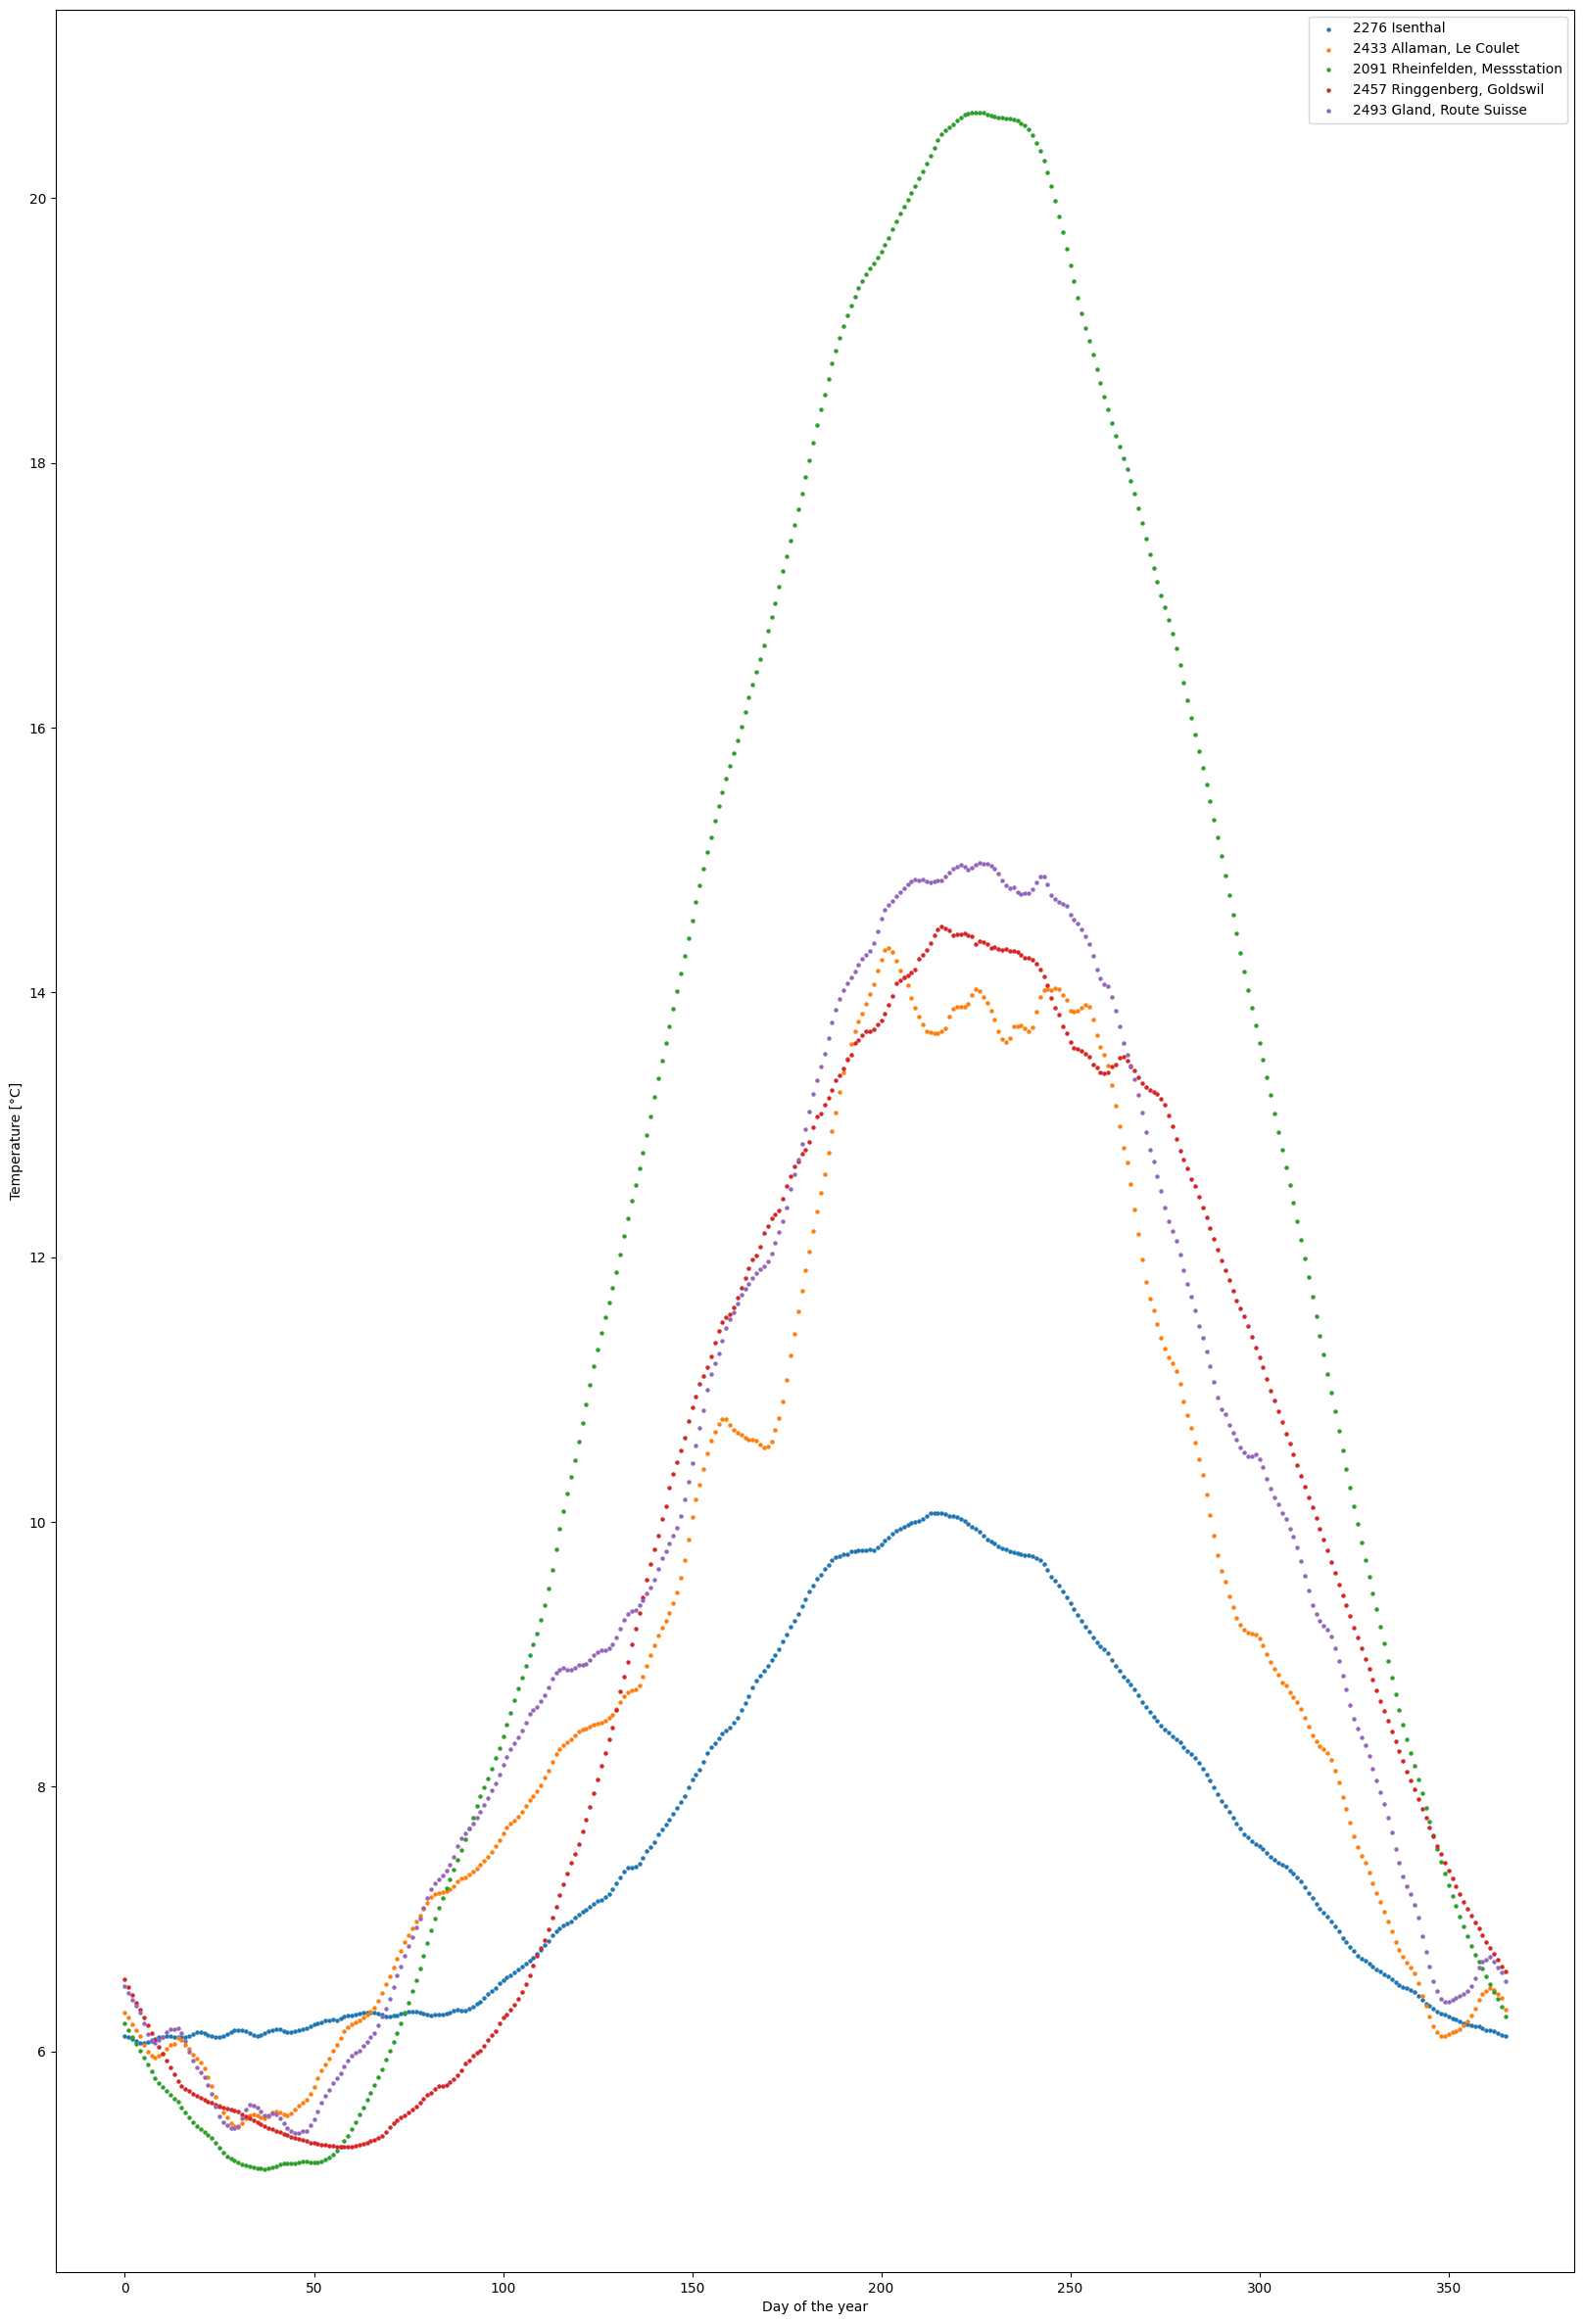

In [14]:
special_stations_numbers = [2276,2433,2091,2457, 2493]

labels = list()
#plot the stations belonging to the special station numbers
plt.figure(figsize=(20,30))
for station in special_stations_numbers:
    station_data = dfmf.get_running_mean_df(station, 15, flow_temp_df, Wert)
    plt.scatter(station_data.index, station_data[Wert], s = 5)
    station_data['mean'] = station_data[Wert].mean()
    #plt.plot(station_data.index, station_data['mean'])
    #add to each curve the number and name of the station
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station]['Stationsname'].unique()[0]
    labels.append(str(station)+ " " + station_name)       
plt.xlabel('Day of the year')

if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
    
plt.legend(labels)


## Results:
- the general trend in temprerarture follows the temperature of the air as expectet
- some curves reach their peak earlier than others and some fluctuate more than others


c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


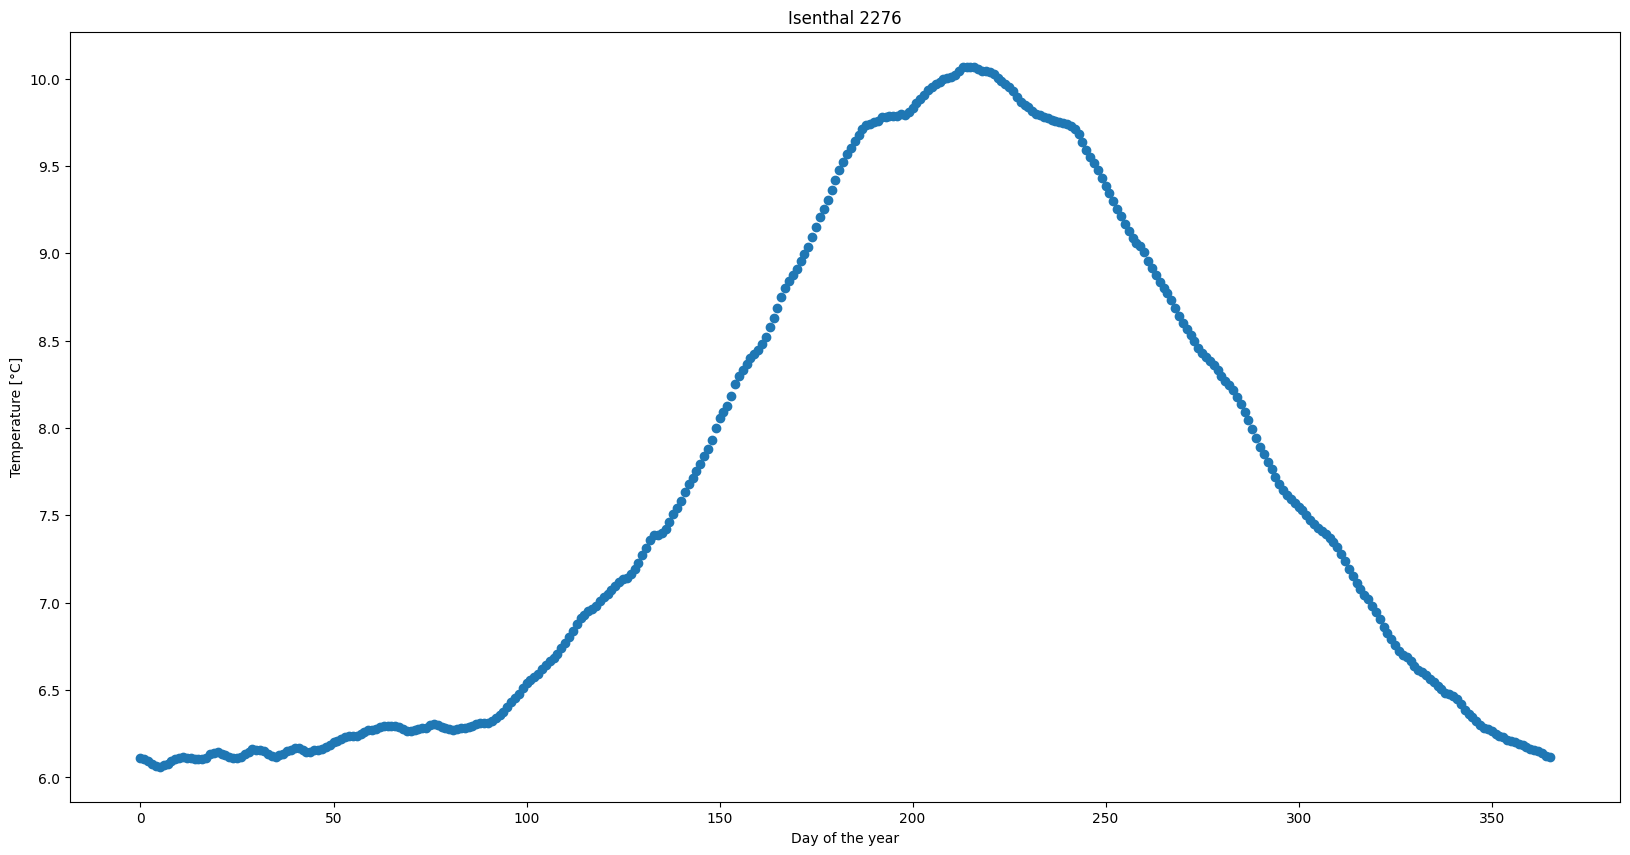

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


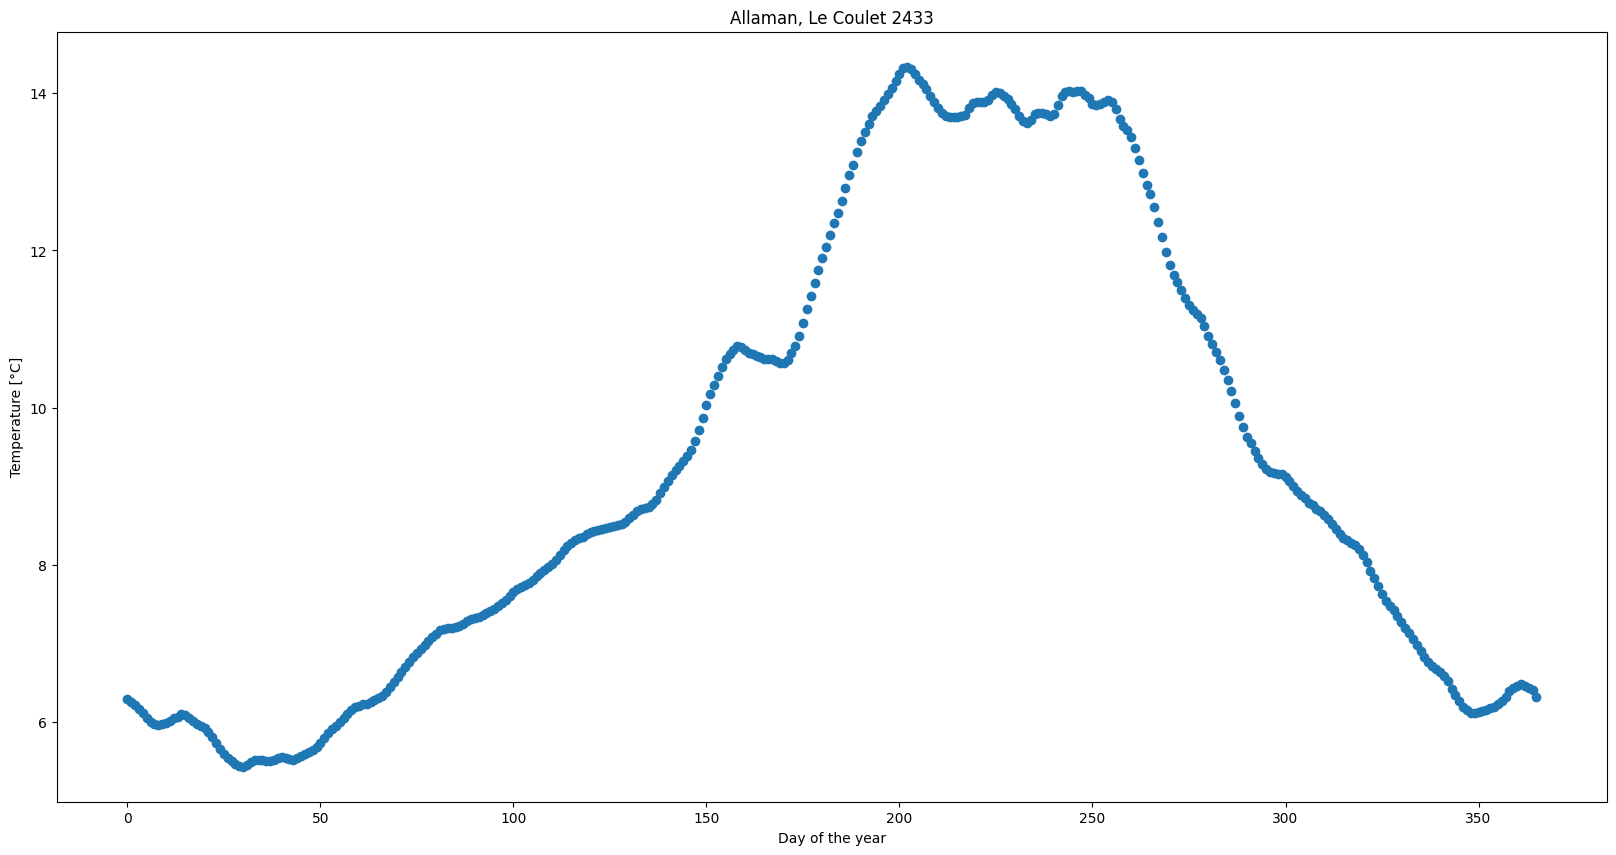

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


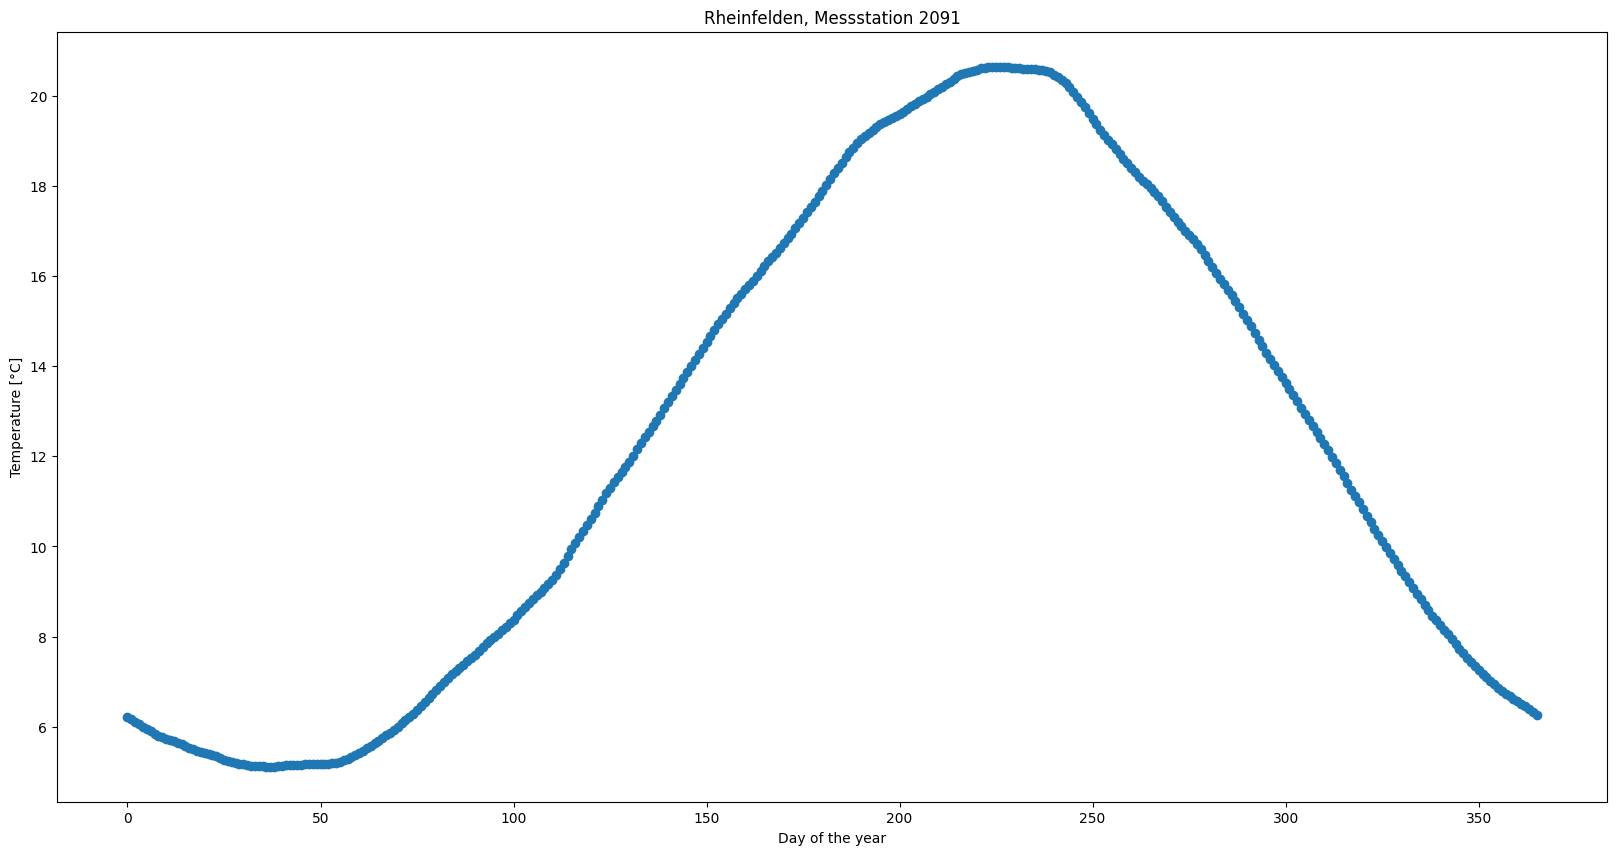

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


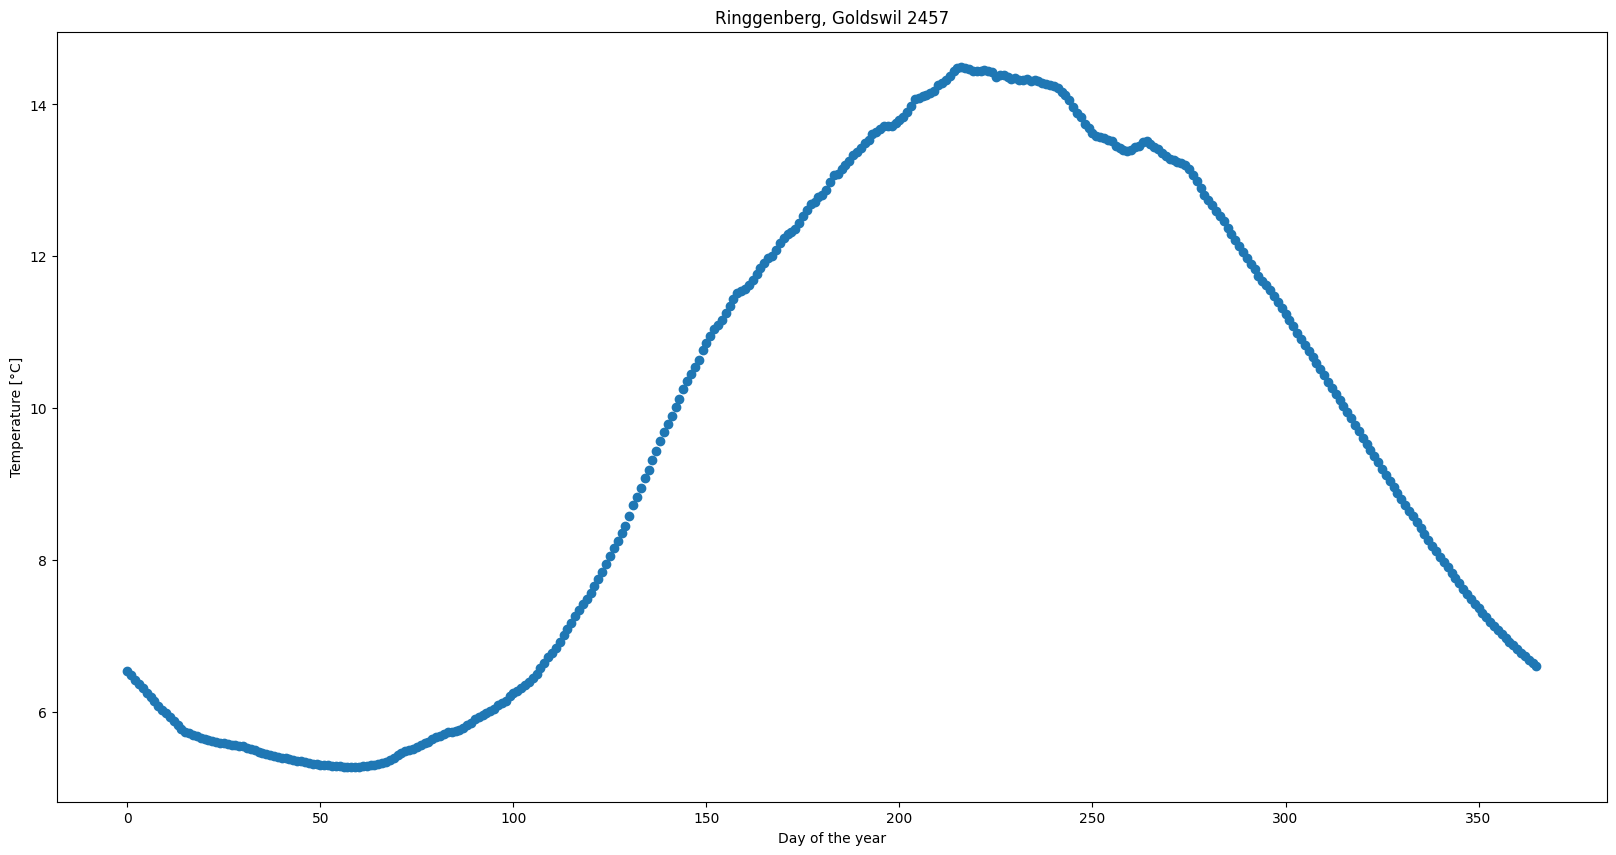

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


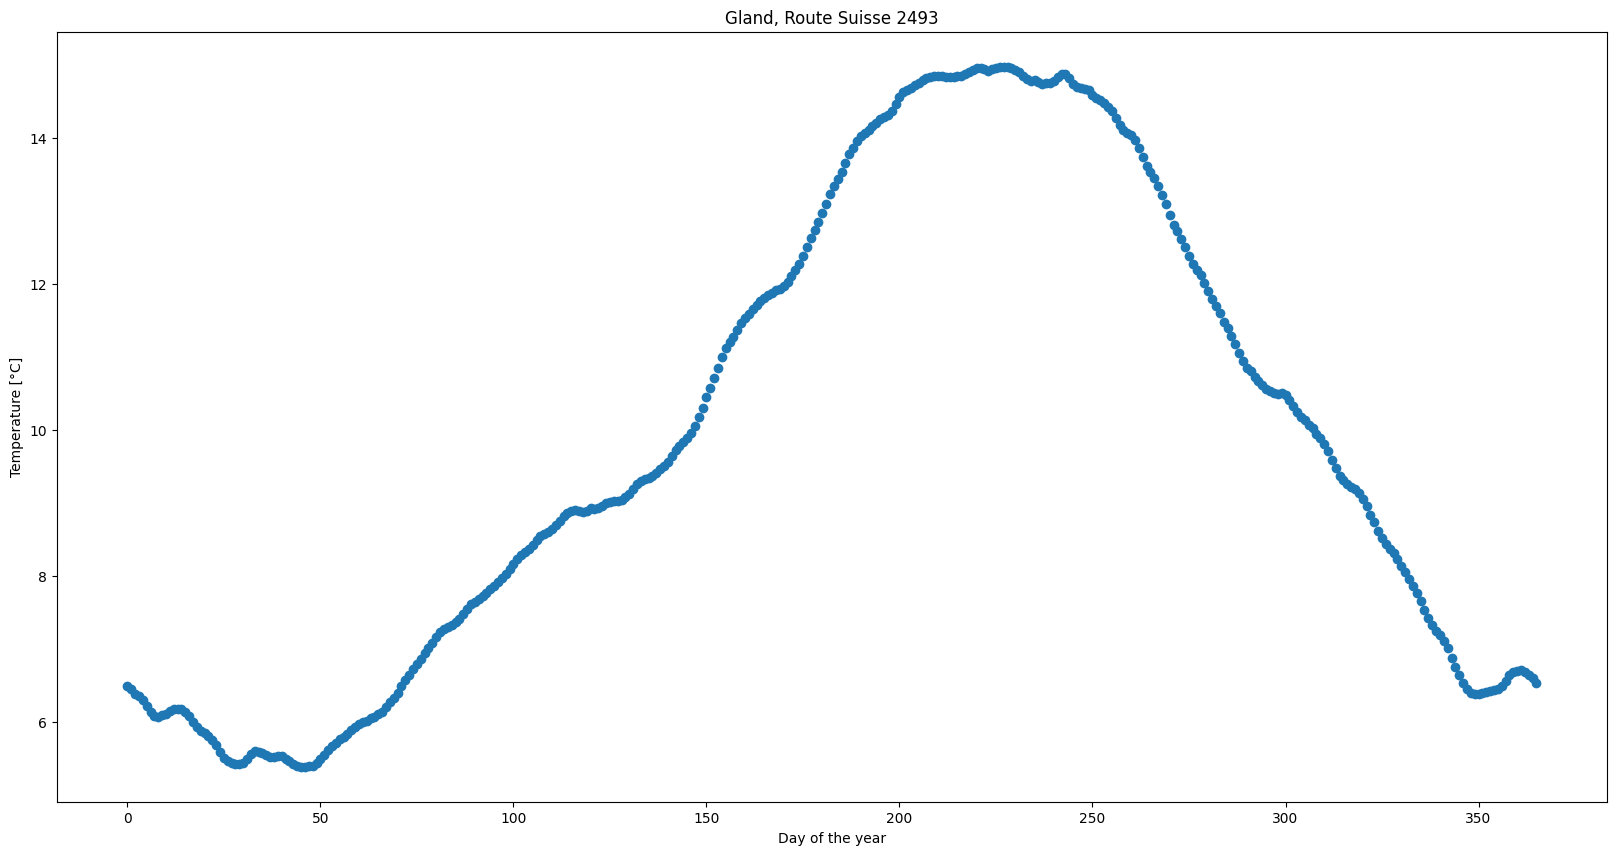

In [15]:
# plot the special stations seperatly

for station_number in special_stations_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.figure(figsize=(20,10))
    plt.scatter(station_data.index, station_data[Wert])
    #print stations name and number	as title
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station_number]['Stationsname'].unique()[0]
    plt.title(station_name + ' ' + str(station_number))

    plt.xlabel('Day of the year')
    if Wert == 'Flow_Wert':
        plt.ylabel('Flow [m$^3$/s]')
    else:
        plt.ylabel('Temperature [°C]')
        
    
    plt.show()


# 3. Feature tests
- goal: to find features which characterize the above mentioned curves


In [16]:

# create df with same columns as staion_df
merged_station_running_df = pd.DataFrame(columns=['Zeitstempel', 'Stationsnummer',	'Flow_Wert', 	'Temp_Wert'])
chosen_example_station_numbers = [2493,2433,2091]

for station_number in chosen_example_station_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    merged_station_running_df = merged_station_running_df.append(station_data)

merged_station_running_df.head()



c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_28836\4269033381.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_station_running_df = merged_station_running_df.append(station_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Te

Zeitstempel  Stationsnummer  Flow_Wert  Temp_Wert
0         NaN          2493.0   2.814333   6.492296
1         NaN          2493.0   2.842452   6.442444
2         NaN          2493.0   2.865037   6.386889
3         NaN          2493.0   2.985237   6.345926
4         NaN          2493.0   3.050607   6.295185

In [17]:
#calculate the mean of the running mean, std, min, max, median, values for each station and save them to df ruda_features_df
basic_features_df = pd.DataFrame(columns=['Stationsnummer', 'mean', 'std', 'min', 'max', 'median'])
for station_number in chosen_example_station_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    basic_features_df = basic_features_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
basic_features_df.head()

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_28836\752196699.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features_df = basic_features_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functio

Stationsnummer       mean       std       min        max     median  \
0          2493.0   9.852875  3.247291  5.383704  14.975333   9.279778   
1          2433.0   9.271832  2.938598  5.428667  14.337867   8.533533   
2          2091.0  12.291064  5.472437  5.111622  20.647850  11.866499   

       range  
0   9.591630  
1   8.909200  
2  15.536228

## 3.1 Show the different features in the plotted data

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

Gland, Route Suisse 2493
Allaman, Le Coulet 2433
Rheinfelden, Messstation 2091


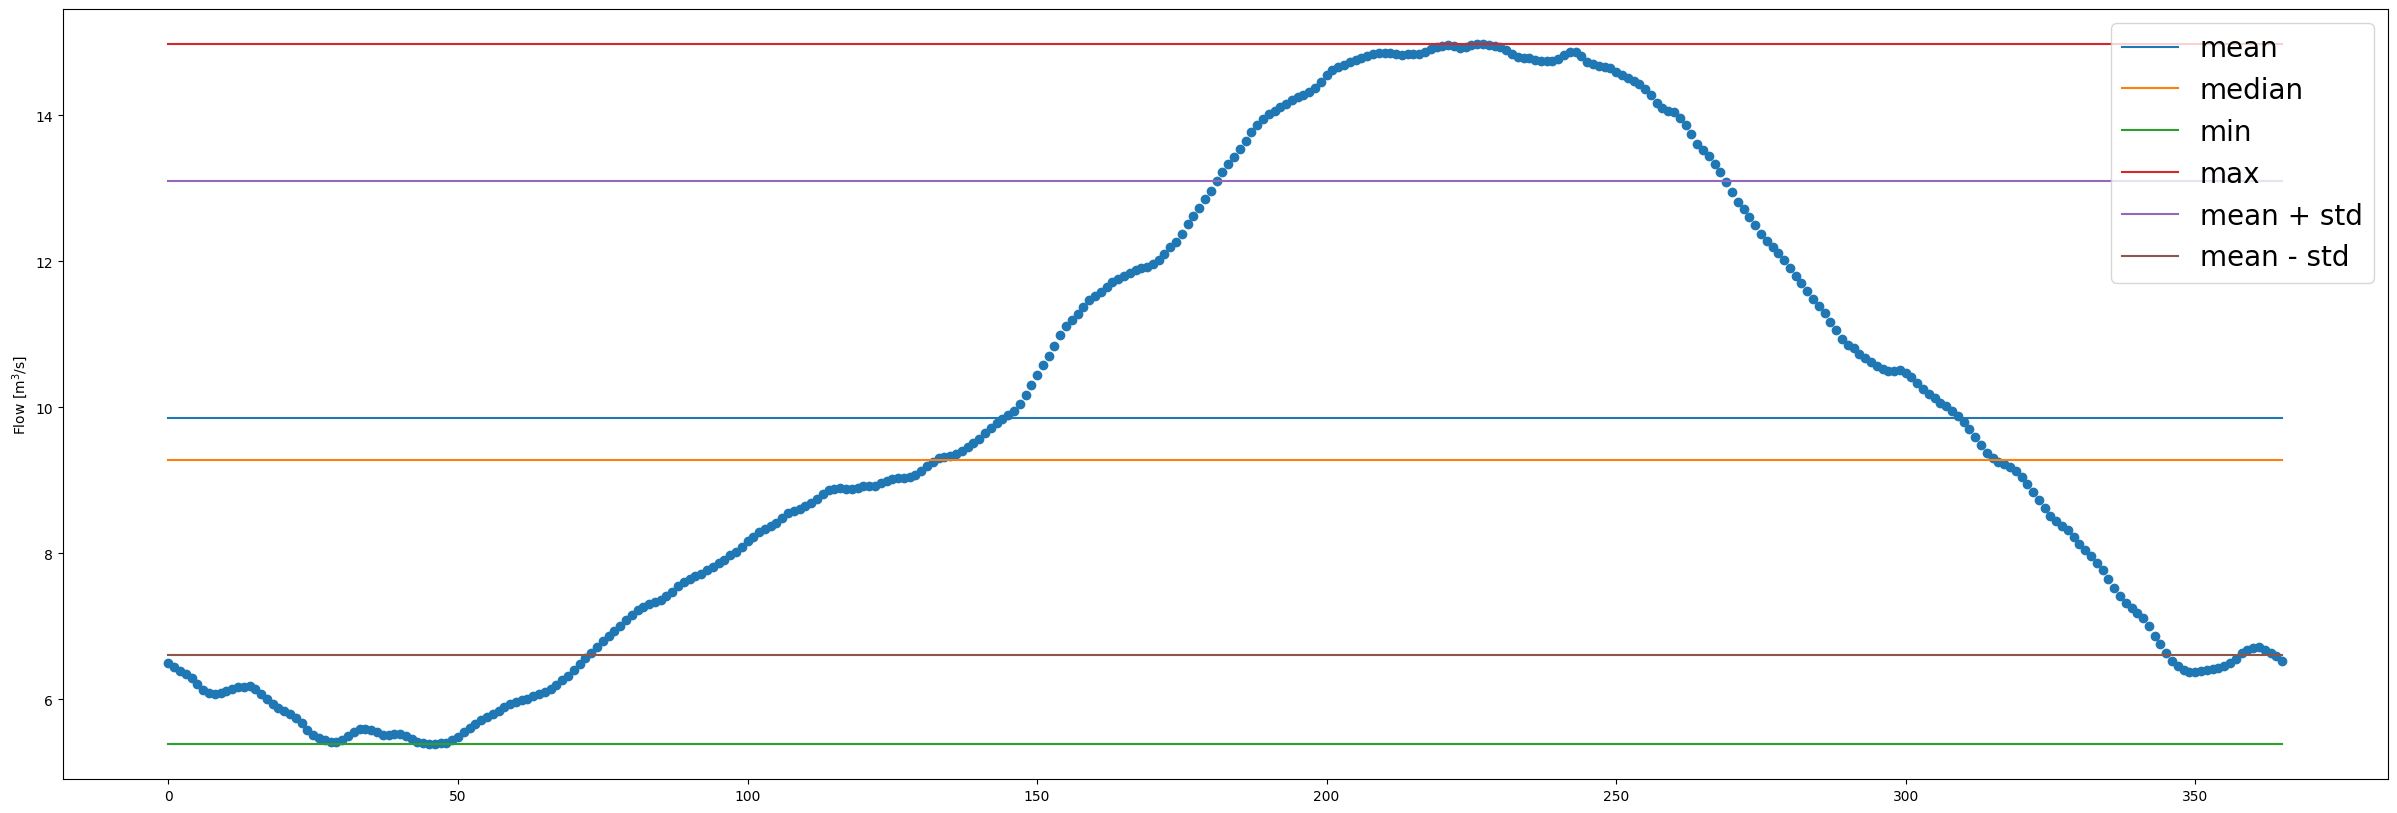

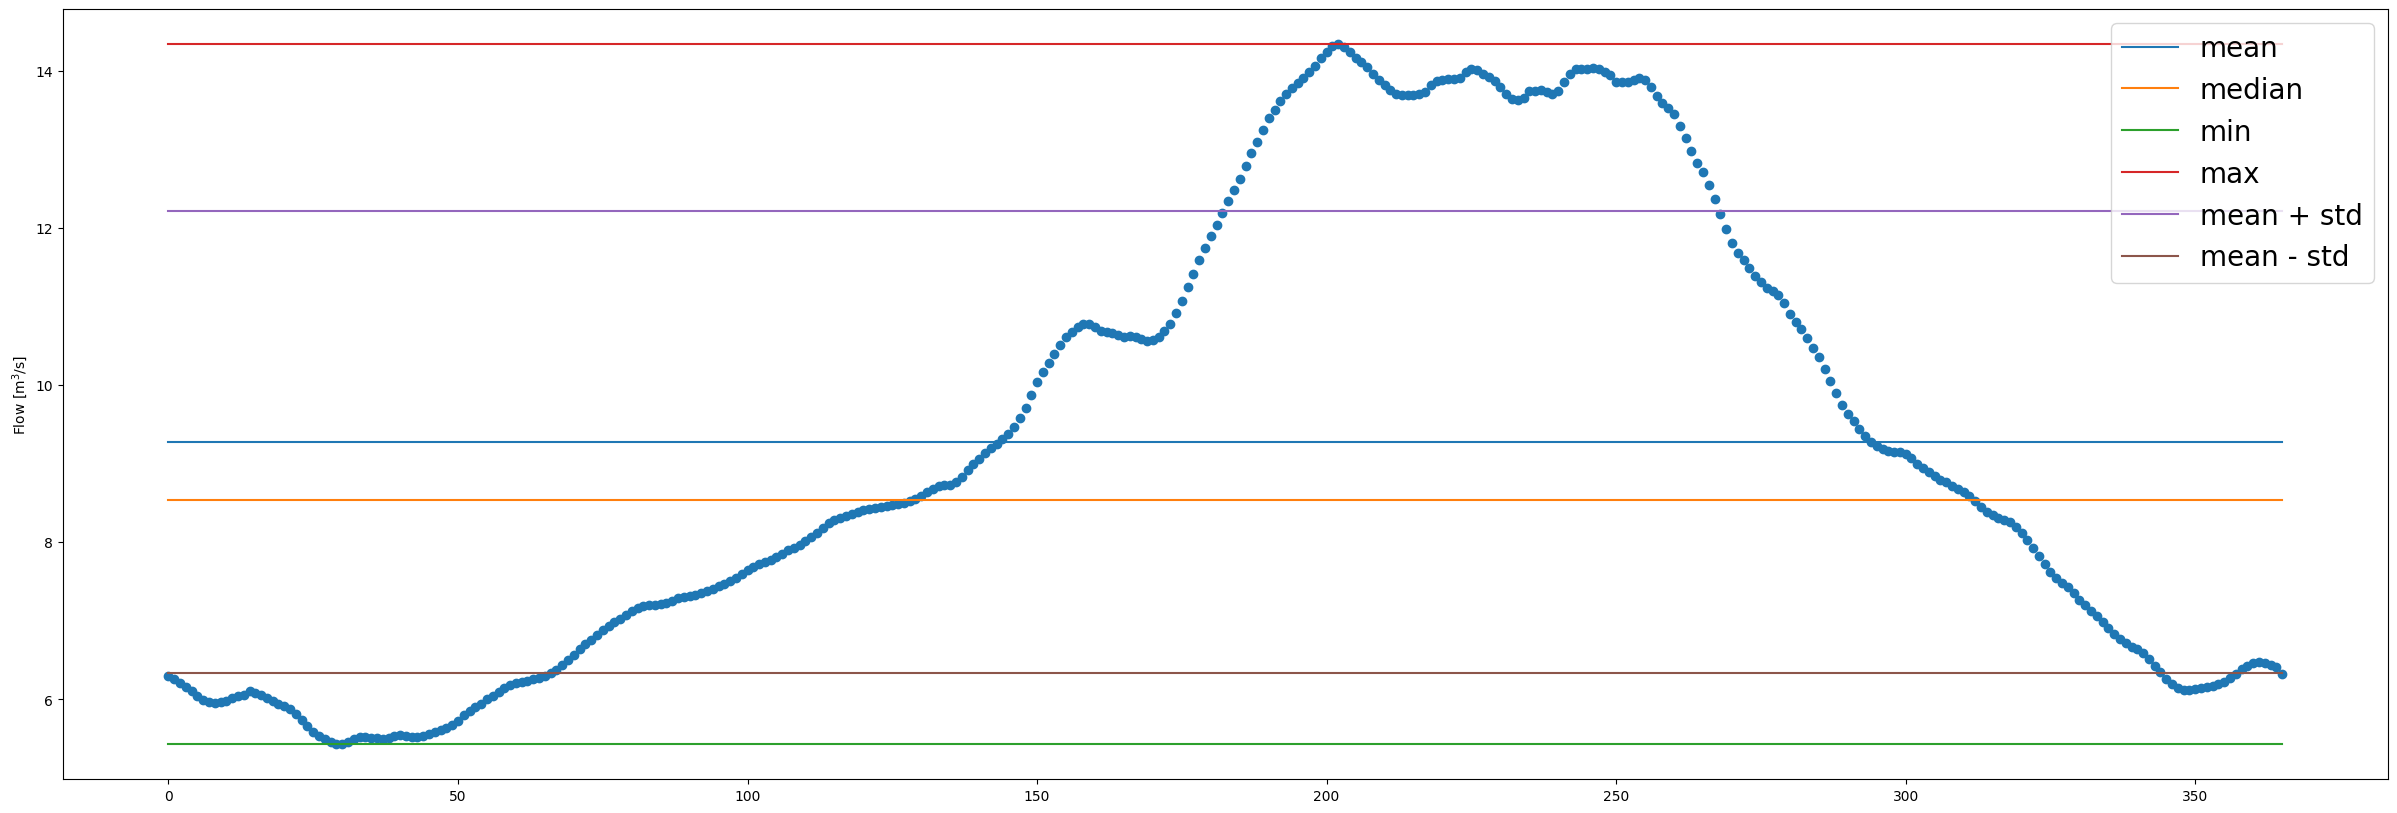

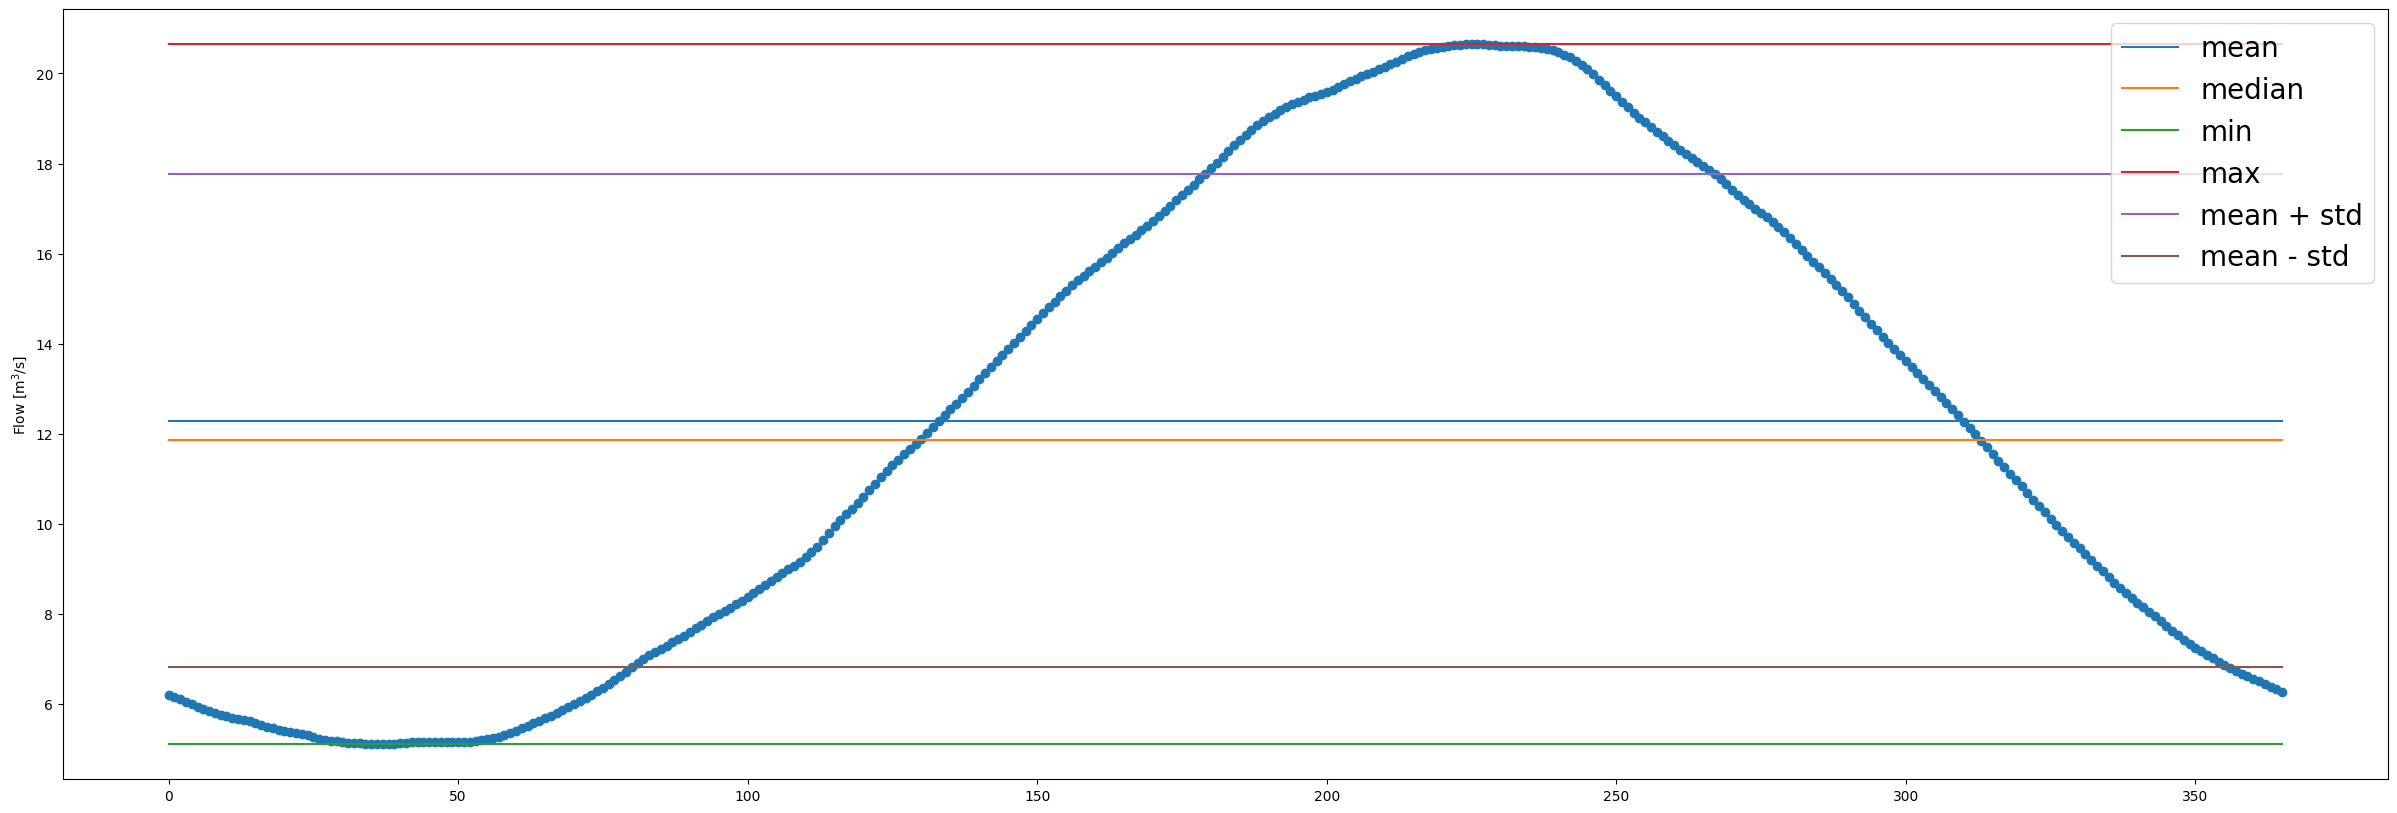

In [18]:
for station_number in chosen_example_station_numbers:
    #plot min, max and mean and median of each station
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.figure(figsize=(30,10))
    plt.scatter(station_data.index, station_data[Wert])
    plt.plot(station_data.index, [station_data[Wert].mean()] *366, label='mean')
    plt.plot(station_data.index, [station_data[Wert].median()]*366, label='median')
    plt.plot(station_data.index, [station_data[Wert].min()]*366, label='min')
    plt.plot(station_data.index, [station_data[Wert].max()]*366, label='max')
    # plot the standard deviation in an appropriate way
    plt.plot(station_data.index, [station_data[Wert].mean() + station_data[Wert].std()]*366, label='mean + std')
    plt.plot(station_data.index, [station_data[Wert].mean() - station_data[Wert].std()]*366, label='mean - std')
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station_number]['Stationsname'].unique()[0]
    #plt.title(station_name + ' ' + str(station_number))
    #make bigger legend
    print(station_name + ' ' + str(station_number))
    plt.legend( loc="upper right", fontsize = "20")
    if Wert == 'Flow_Wert':
        plt.ylabel('Flow [m$^3$/s]')
    else:
        plt.ylabel('Temperature [°C]')
        
    plt.ylabel('Flow [m$^3$/s]')

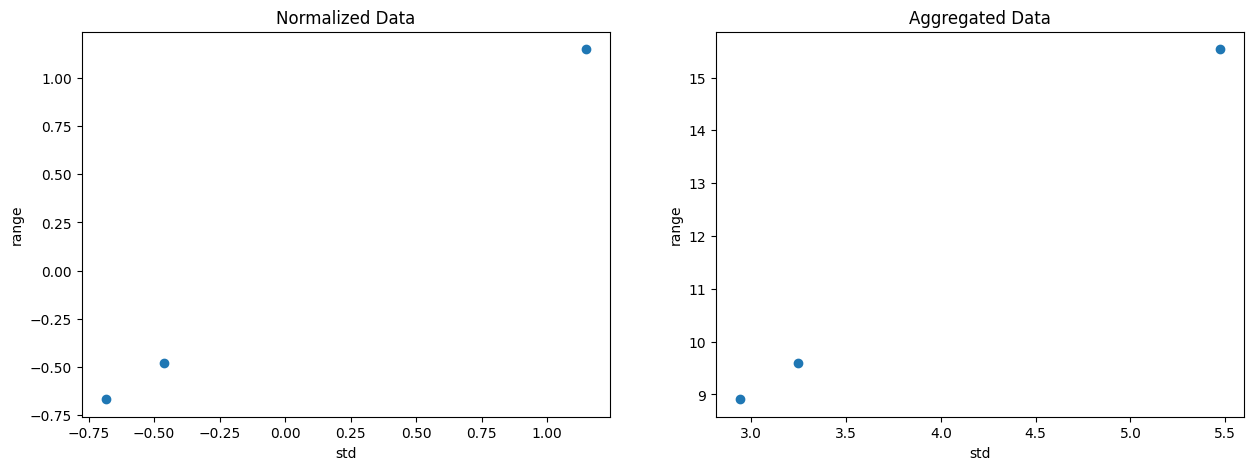

In [19]:
#plot the range and std of the ruda_fetures_df in a scatterpllot
basic_normalized_chosen_df = dfmf.normalize_data(basic_features_df)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.set_xlim(-10,600)
# ax2.set_xlim(-10,600)
# ax1.set_ylim(-10,16)
# ax2.set_ylim(-10,16)
ax1.scatter(basic_normalized_chosen_df['std'], basic_normalized_chosen_df['range'])
ax1.set_title('Normalized Data')
ax1.set_xlabel('std')
ax1.set_ylabel('range')
ax2.scatter(basic_features_df['std'], basic_features_df['range'])
ax2.set_title('Aggregated Data')
ax2.set_xlabel('std')
ax2.set_ylabel('range')


plt.show()

c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


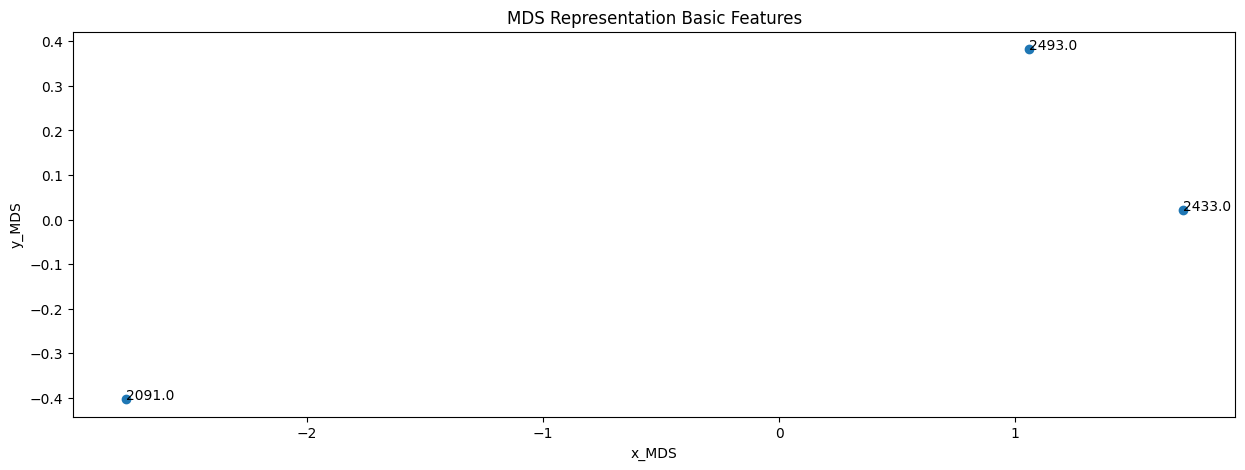

In [20]:
basic_mds_chosen_rep = dfmf.create_mds_represntation(basic_normalized_chosen_df)
#plot the mds
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
ax1.scatter(basic_mds_chosen_rep['x_MDS'], basic_mds_chosen_rep['y_MDS'])
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
#annotate the points with station numbers
for i, txt in enumerate(basic_mds_chosen_rep['Stationsnummer']):
    ax1.annotate(txt, (basic_mds_chosen_rep['x_MDS'][i], basic_mds_chosen_rep['y_MDS'][i]))

    


## Results:
- looks like might give good clustering results


## 3.2 check with mds for all station

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_28836\3173854445.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features = basic_features.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py

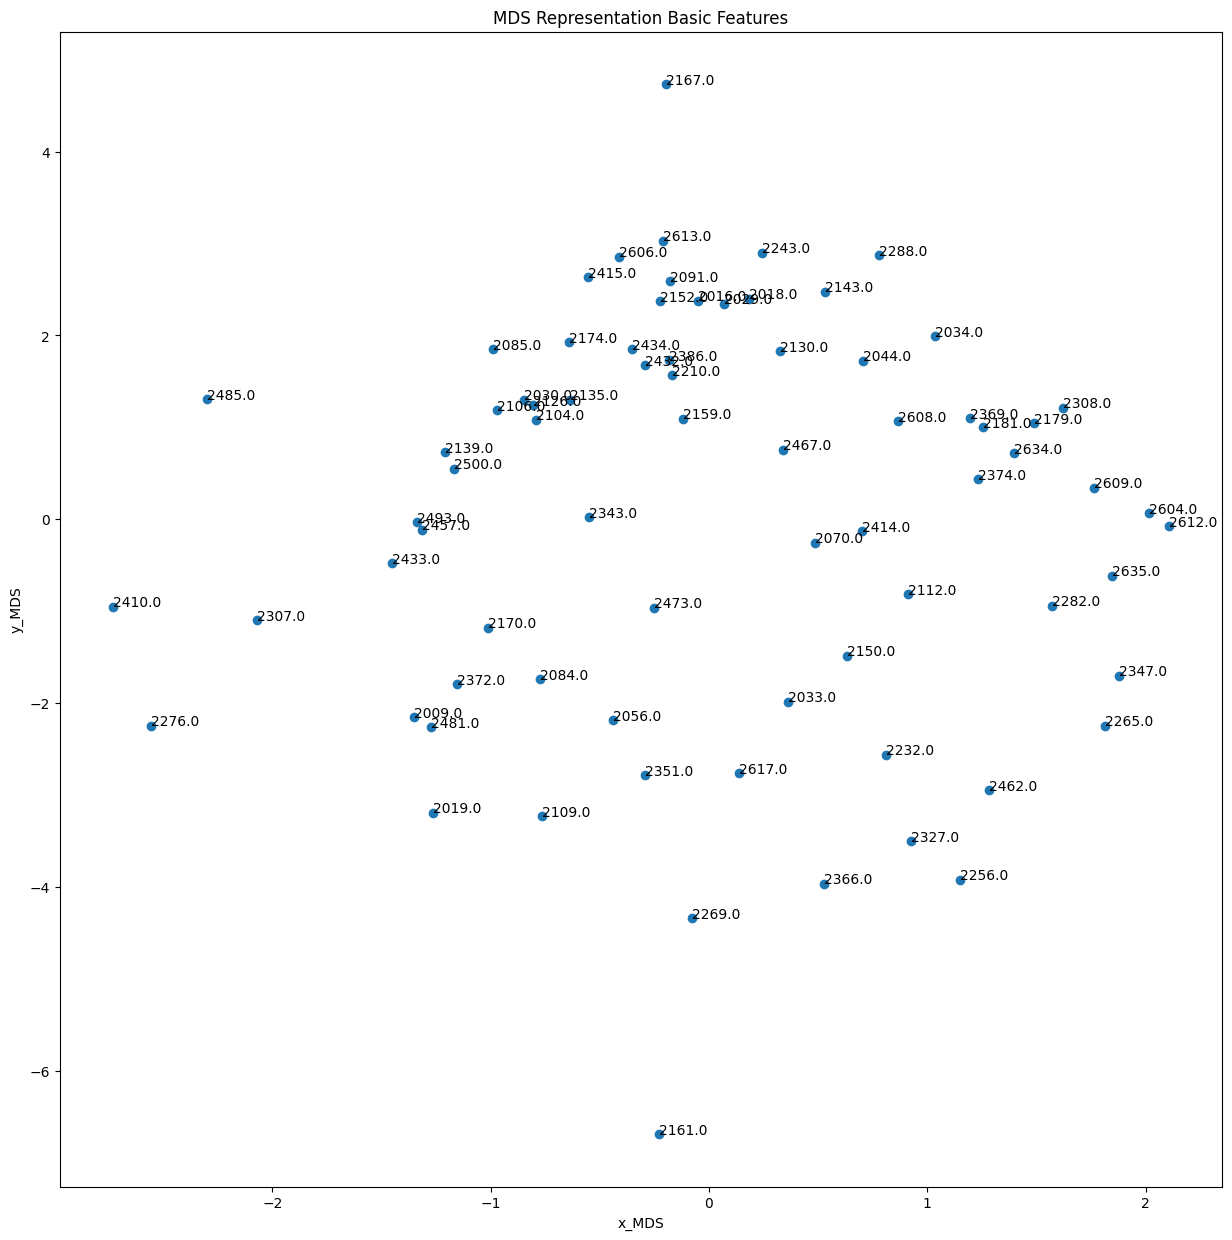

In [21]:
basic_features = pd.DataFrame(columns=['Stationsnummer', 'mean', 'std', 'min', 'max', 'median', 'range'])
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    basic_features = basic_features.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)

basic_features_normalized = dfmf.normalize_data(basic_features)
basic_features_mds = dfmf.create_mds_represntation(basic_features_normalized)

#plot the mds representation
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 15))
ax1.scatter(basic_features_mds['x_MDS'], basic_features_mds['y_MDS'])
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
# add stationsnummer to each point
for i, txt in enumerate(basic_features_mds['Stationsnummer']):
    ax1.annotate(txt, (basic_features_mds['x_MDS'][i], basic_features_mds['y_MDS'][i]))

## Results:
- no clear clusters visible
- this is due to the fact that the curves are pretty similar to each other and the features are not able to distinguish them
- more features will be necessary


# 4. Additional Features
- goal: to find the best features for the clustering
- calculate a lot of features and then select the best ones
- as discussed in the meeting 
    - max slope of the curve (done could be better)
    - time of Scheitelpunkt (done)
    - time above a average (done)
    - time of first upwards crossing of a threshold (done and downwards as well)
    - number of local maximas (not done could be implemented better)
    - similarity
    

In [22]:
#calculate the more advanced features
import df_manipulation_functions as dfmf
#reload the df_manipulation_functions.py file
import importlib
importlib.reload(dfmf)

#calculate the more advanced features
import df_manipulation_functions as dfmf
#reload the df_manipulation_functions.py file
import importlib
importlib.reload(dfmf)


#max slope of the running mean
additional_features = pd.DataFrame()
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    original_station_data = dfmf.get_station_df(station_number, flow_temp_df)
    #additional_features_all = additional_features_all.append({'Stationsnummer': station_number, 'max_slope': dfmf.get_max_slope(station_data),'day_of_max': dfmf.get_day_of_max(station_data)}, ignore_index=True, )
    additional_features = additional_features.append({
        'Stationsnummer': station_number,
              'time_above_average': dfmf.get_time_above_average(station_data,Wert),
                        'similarity_to_mean_year': dfmf.get_similarity_to_mean_year(original_station_data, Wert),
                        'day_of_max': dfmf.get_day_of_max(station_data,Wert),
                        'day_of_min': dfmf.get_day_of_min(station_data,Wert),
                          'day_first_upward_crossing_mean': dfmf.get_time_first_upward_crossing_mean(station_data,Wert),
                          'day_first_downward_crossing_mean' : dfmf.get_time_first_downward_crossing_mean(station_data,Wert),
                            'day_first_upward_crossing_high_quartile' :dfmf.get_time_first_upward_crossing_highquantile(station_data,Wert),
                              'day_downward_crossing_high_quartile' :dfmf.get_time_first_downward_crossing_highquantile(station_data,Wert),
                                'day_downward_crossing_low_quartile' :dfmf.get_time_first_downward_crossing_lowquantile(station_data,Wert),
                                'day_upward_crossing_low_quartile' :dfmf.get_time_first_upward_crossing_lowquantile(station_data,Wert),
                                'min_slope_5': dfmf.get_min_slope(station_data,Wert,5),
                                'max_slope_5': dfmf.get_max_slope(station_data,Wert,5),},      
                              ignore_index=True)

additional_features.head()
display(additional_features)


c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_28836\3249035721.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_features = additional_features.append({
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_28836\3249

Stationsnummer  time_above_average  similarity_to_mean_year  day_of_max  \
0           2009.0               201.0              1418.198601       195.0   
1           2016.0               177.0              1433.988220       222.0   
2           2018.0               175.0              1599.497194       221.0   
3           2019.0               187.0              1616.856014       215.0   
4           2029.0               178.0              1375.500184       224.0   
..             ...                 ...                      ...         ...   
70          2612.0               175.0               899.150354       216.0   
71          2613.0               179.0               793.260792       222.0   
72          2617.0               178.0               698.843326       221.0   
73          2634.0               174.0              2467.132552       215.0   
74          2635.0               173.0              1209.731021       214.0   

    day_of_min  day_first_upward_crossing_mean  \
0          7.0                           105.0   
1         38.0                           133.0   
2         36.0                           133.0   
3         29.0                           131.0   
4         54.0                           138.0   
..         ...                             ...   
70        31.0                           133.0   
71        39.0                           131.0   
72        28.0                           118.0   
73        30.0                           128.0   
74        36.0                           129.0   

    day_first_downward_crossing_mean  day_first_upward_crossing_high_quartile  \
0                              305.0                                    124.0   
1                              309.0                                    169.0   
2                              307.0                                    171.0   
3                              317.0                                    158.0   
4                              315.0                                    173.0   
..                               ...                                      ...   
70                             307.0                                    170.0   
71                             309.0                                    167.0   
72                             295.0                                    166.0   
73                             301.0                                    168.0   
74                             301.0                                    159.0   

    day_downward_crossing_high_quartile  day_downward_crossing_low_quartile  \
0                                 285.0                               331.0   
1                                 276.0                               333.0   
2                                 273.0                               330.0   
3                                 299.0                               334.0   
4                                 282.0                               342.0   
..                                  ...                                 ...   
70                                267.0                               327.0   
71                                273.0                               334.0   
72                                266.0                               322.0   
73                                267.0                               323.0   
74                                267.0                               324.0   

    day_upward_crossing_low_quartile  min_slope_5  max_slope_5  
0                               75.0    -0.355577     0.452715  
1                              105.0    -0.720715     0.757984  
2                              105.0    -0.735122     0.762862  
3                               83.0    -0.207268     0.427447  
4                              114.0    -0.838650     0.714472  
..                               ...          ...          ...  
70                              97.0    -0.848311     1.022311  
71          

# 5. All features together


c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Stationsnummer      mean       std       min       max    median     range  \
0          2009.0 -0.667230 -1.427805  0.289293 -1.196871 -0.447632 -1.506169   
1          2016.0  1.080488  0.936700  0.695609  1.076584  1.056337  0.922319   
2          2018.0  1.025763  1.046381  0.574559  1.144100  0.934359  1.054670   
3          2019.0 -1.159378 -1.785019  0.044794 -1.598523 -1.116639 -1.857064   
4          2029.0  1.049048  0.964961  0.585312  1.066532  1.032407  0.960674   

   time_above_average  similarity_to_mean_year  day_of_max  day_of_min  \
0            1.683367                 0.534173       195.0         7.0   
1           -0.346145                 0.562888       222.0        38.0   
2           -0.515271                 0.863883       221.0        36.0   
3            0.499485                 0.895452       215.0        29.0   
4           -0.261582                 0.456522       224.0        54.0   

   day_first_upward_crossing_mean  day_first_downward_crossing_mean  \
0                           105.0                             305.0   
1                           133.0                             309.0   
2                           133.0                             307.0   
3                           131.0                             317.0   
4                           138.0                             315.0   

   day_first_upward_crossing_high_quartile  \
0                                    124.0   
1                                    169.0   
2                                    171.0   
3                                    158.0   
4                                    173.0   

   day_downward_crossing_high_quartile  day_downward_crossing_low_quartile  \
0                                285.0                               331.0   
1                                276.0                               333.0   
2                                273.0                               330.0   
3                                299.0                               334.0   
4                                282.0                               342.0   

   day_upward_crossing_low_quartile  min_slope_5  max_slope_5  
0                              75.0     1.334839    -1.325092  
1                             105.0    -0.184851     0.296491  
2                             105.0    -0.244810     0.322403  
3                              83.0     1.952094    -1.459317  
4                             114.0    -0.675691     0.065355

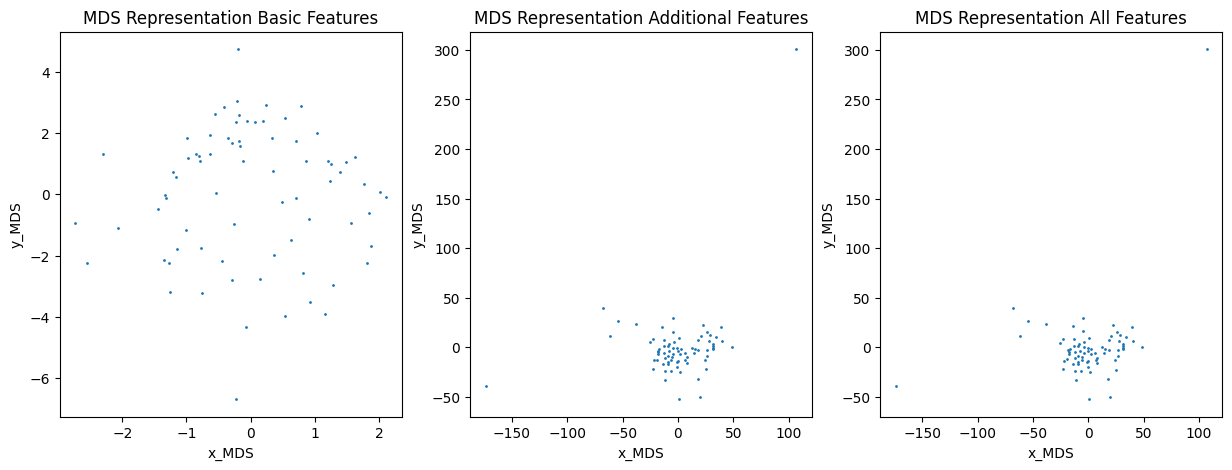

In [23]:
#calculate the more advanced features
import df_manipulation_functions as dfmf
#reload the df_manipulation_functions.py file
import importlib
importlib.reload(dfmf)


#concatenate all the features
all_features = pd.merge(basic_features, additional_features, on='Stationsnummer')
# normalize additional features
additional_features_all_normalized = dfmf.normalize_data(additional_features)
#concatenate the normalized additional features with the normalized basic features
all_features_normalized = pd.merge(basic_features_normalized, additional_features_all_normalized, on='Stationsnummer')
additional_features_mds = dfmf.create_mds_represntation(additional_features_all_normalized)

# get mds representation of the normalized additional features
all_features_mds = dfmf.create_mds_represntation(all_features_normalized)

#plot the mds for all features and the rudia features
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(basic_features_mds['x_MDS'], basic_features_mds['y_MDS'], s=1)
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
ax2.scatter(additional_features_mds['x_MDS'], additional_features_mds['y_MDS'], s=1)
ax2.set_title('MDS Representation Additional Features')
ax2.set_xlabel('x_MDS')
ax2.set_ylabel('y_MDS')
ax3.scatter(all_features_mds['x_MDS'], all_features_mds['y_MDS'], s=1)
ax3.set_title('MDS Representation All Features')
ax3.set_xlabel('x_MDS')
ax3.set_ylabel('y_MDS')


#set scale to the same
ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())

# #save all features to pickle file
# all_features_all.to_pickle('Temp_Features/all_features_temp.pkl')

# # save ruda features to pickle file
# basic_features_all_df.to_pickle('Temp_Features/basic_features_temp.pkl')

# # save additional features to pickle file
# additional_features_all.to_pickle('Temp_Features/additional_features_temp.pkl')

# #save all normalized features to pickle file
# all_normalized_all_df.to_pickle('Temp_Features/all_normalized_temp.pkl')

# #save ruda normalized features to pickle file
# basic_features_normalized_all_df.to_pickle('Temp_Features/basic_normalized_temp.pkl')

# #save additional features normalized to pickle file
# additional_features_all_normalized.to_pickle('Temp_Features/additional_normalized_temp.pkl')

# #save the mds data to pickle file
# all_mds_all_df.to_pickle('Temp_mds/all_mds_temp.pkl')

# #save th ruda mds data to pickle file
# basic_mds_all_df.to_pickle('Temp_mds/basic_mds_temp.pkl')


all_features_normalized.head()


## Result 
- no clear clusters visible
- maybe there are even more features needed to distinguish the temperature curves better


# 6. Take periodicity for certain features into account 
- for all day features use\
    - day_sin = sin (day /365 *2pi)\
    - day_cos = cos (day /365 *2pi)

as new feature

In [24]:
#create feature dataframe with periodicity taken into account
#take all features all and replace the day of the year features with their sin and cosine function
import importlib
importlib.reload(dfmf)

#day_of_max
all_features['day_of_max_sin'], all_features['day_of_max_cos'] = dfmf.get_sin_cos_rep(all_features['day_of_max'])
all_features= all_features.drop(['day_of_max'], axis=1)
#day_first_upward_crossing_mean
all_features['day_first_upward_crossing_mean_sin'], all_features['day_first_upward_crossing_mean_cos'] = dfmf.get_sin_cos_rep(all_features['day_first_upward_crossing_mean'])
all_features= all_features.drop(['day_first_upward_crossing_mean'], axis=1)
#day_first_upward_crossing_high_quartile
all_features['day_first_upward_crossing_high_quartile_sin'], all_features['day_first_upward_crossing_high_quartile_cos'] = dfmf.get_sin_cos_rep(all_features['day_first_upward_crossing_high_quartile'])
all_features= all_features.drop(['day_first_upward_crossing_high_quartile'], axis=1)
#day_downward_crossing_high_quartile
all_features['day_downward_crossing_high_quartile_sin'], all_features['day_downward_crossing_high_quartile_cos'] = dfmf.get_sin_cos_rep(all_features['day_downward_crossing_high_quartile'])
all_features= all_features.drop(['day_downward_crossing_high_quartile'], axis=1)
#day_downward_crossing_low_quartile
all_features['day_downward_crossing_low_quartile_sin'], all_features['day_downward_crossing_low_quartile_cos'] = dfmf.get_sin_cos_rep(all_features['day_downward_crossing_low_quartile'])
all_features= all_features.drop(['day_downward_crossing_low_quartile'], axis=1)
#day_upward_crossing_low_quartile
all_features['day_upward_crossing_low_quartile_sin'], all_features['day_upward_crossing_low_quartile_cos'] = dfmf.get_sin_cos_rep(all_features['day_upward_crossing_low_quartile'])
all_features= all_features.drop(['day_upward_crossing_low_quartile'], axis=1)
#day_first_downward_crossing_mean
all_features['day_first_downward_crossing_mean_sin'], all_features['day_first_downward_crossing_mean_cos'] = dfmf.get_sin_cos_rep(all_features['day_first_downward_crossing_mean'])
all_features= all_features.drop(['day_first_downward_crossing_mean'], axis=1)
#day_of_min
all_features['day_of_min_sin'], all_features['day_of_min_cos'] = dfmf.get_sin_cos_rep(all_features['day_of_min'])
all_features= all_features.drop(['day_of_min'], axis=1)





all_features.head()

Stationsnummer       mean       std       min        max     median  \
0          2009.0   7.309960  2.100069  4.082982   9.868114   7.792813   
1          2016.0  11.998066  5.404501  4.811008  20.213024  11.634476   
2          2018.0  11.851271  5.557782  4.594114  20.520244  11.322902   
3          2019.0   5.989815  1.600858  3.644894   8.040472   6.083935   
4          2029.0  11.913733  5.443995  4.613382  20.167285  11.573350   

       range  time_above_average  similarity_to_mean_year  min_slope_5  ...  \
0   5.785132               201.0              1418.198601    -0.355577  ...   
1  15.402016               177.0              1433.988220    -0.720715  ...   
2  15.926130               175.0              1599.497194    -0.735122  ...   
3   4.395577               187.0              1616.856014    -0.207268  ...   
4  15.553902               178.0              1375.500184    -0.838650  ...   

   day_downward_crossing_high_quartile_sin  \
0                                -0.981306   
1                                -0.999250   
2                                -0.999917   
3                                -0.907014   
4                                -0.989932   

   day_downward_crossing_high_quartile_cos  \
0                                 0.192452   
1                                 0.038722   
2                                -0.012910   
3                                 0.421101   
4                                 0.141540   

   day_downward_crossing_low_quartile_sin  \
0                               -0.552435   
1                               -0.523416   
2                               -0.566702   
3                               -0.508671   
4                               -0.385663   

   day_downward_crossing_low_quartile_cos  \
0                                0.833556   
1                                0.852078   
2                                0.823923   
3                                0.860961   
4                                0.922640   

   day_upward_crossing_low_quartile_sin  day_upward_crossing_low_quartile_cos  \
0                              0.961130                              0.276097   
1                              0.972118                             -0.234491   
2                              0.972118                             -0.234491   
3                              0.989932                              0.141540   
4                              0.924291                             -0.381689   

   day_first_downward_crossing_mean_sin  day_first_downward_crossing_mean_cos  \
0                             -0.858764                              0.512371   
1                             -0.821477                              0.570242   
2                             -0.840618                              0.541628   
3                             -0.735417                              0.677615   
4                             -0.758306                              0.651899   

   day_of_min_sin  day_of_min_cos  
0        0.120208        0.992749  
1        0.608477        0.793572  
2        0.580800        0.814046  
3        0.478734        0.877960  
4        0.801361        0.598181  

[5 rows x 27 columns]

In [25]:
# all_features_normalized = dfmf.normalize_data(all_features)
# all_features_mds = dfmf.create_mds_represntation(all_features_normalized)

# #save all flow features in a pickle file 
# all_features.to_pickle('Temp_Features/all_features_temp.pkl')

# all_features_normalized.to_pickle('Temp_Features/all_normalized_temp.pkl')

# all_features_mds.to_pickle('Temp_mds/all_mds_temp.pkl')

# #save all basic temp features
# basic_features = all_features[['Stationsnummer', 'mean','std', 'min', 'max',  'median', 'range']]
# basic_features.to_pickle('Temp_Features/basic_features_temp.pkl')
# basic_features_normalized = all_features_normalized[['Stationsnummer', 'mean','std', 'min', 'max',  'median', 'range']]
# basic_features_normalized.to_pickle('Temp_Features/basic_features_normalized_temp.pkl')
# basic_features_mds_temp = dfmf.create_mds_represntation(basic_features_normalized)
# basic_features_mds_temp.to_pickle('Temp_mds/basic_features_mds_temp.pkl')

# #save all additional temp features drop the basic features
# additional_features = all_features.drop(['mean','std', 'min', 'max',  'median', 'range'], axis=1)
# additional_features.to_pickle('Temp_Features/additional_features_temp.pkl')
# additional_features_normalized_temp = all_features_normalized.drop(['mean','std', 'min', 'max',  'median', 'range'], axis=1)
# additional_features_normalized_temp.to_pickle('Temp_Features/additional_features_normalized_temp.pkl')
# additional_features_mds_temp = dfmf.create_mds_represntation(additional_features_normalized_temp)
# additional_features_mds_temp.to_pickle('Temp_mds/additional_features_mds_temp.pkl')


all_features_normalized = dfmf.normalize_data(all_features)
all_features_mds = dfmf.create_mds_represntation(all_features_normalized)

additional_features_normalized = all_features_normalized.drop(['mean','std', 'min', 'max',  'median', 'range'], axis=1)
additional_features_mds = dfmf.create_mds_represntation(additional_features_normalized)

basic_features_normalized = all_features_normalized[['Stationsnummer', 'mean','std', 'min', 'max',  'median', 'range']]
basic_features_mds = dfmf.create_mds_represntation(basic_features_normalized)


#save all features in a pickle file 
all_features.to_pickle('Temp_Features/all_features_temp.pkl')
#all_features_normalized.to_pickle('Flow_Features/all_features_normalized_flow.pkl')
all_features_mds.to_pickle('Temp_mds/all_features_mds_temp.pkl')

basic_features.to_pickle('Temp_Features/basic_features_temp.pkl')
basic_features_mds.to_pickle('Temp_mds/basic_features_mds_temp.pkl')

additional_features.to_pickle('Temp_Features/additional_features_temp.pkl')
additional_features_mds.to_pickle('Temp_mds/additional_features_mds_temp.pkl')

all_features_normalized.head()

c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Stationsnummer      mean       std       min       max    median     range  \
0          2009.0 -0.667230 -1.427805  0.289293 -1.196871 -0.447632 -1.506169   
1          2016.0  1.080488  0.936700  0.695609  1.076584  1.056337  0.922319   
2          2018.0  1.025763  1.046381  0.574559  1.144100  0.934359  1.054670   
3          2019.0 -1.159378 -1.785019  0.044794 -1.598523 -1.116639 -1.857064   
4          2029.0  1.049048  0.964961  0.585312  1.066532  1.032407  0.960674   

   time_above_average  similarity_to_mean_year  min_slope_5  ...  \
0            1.683367                 0.534173     1.334839  ...   
1           -0.346145                 0.562888    -0.184851  ...   
2           -0.515271                 0.863883    -0.244810  ...   
3            0.499485                 0.895452     1.952094  ...   
4           -0.261582                 0.456522    -0.675691  ...   

   day_downward_crossing_high_quartile_sin  \
0                                -0.981306   
1                                -0.999250   
2                                -0.999917   
3                                -0.907014   
4                                -0.989932   

   day_downward_crossing_high_quartile_cos  \
0                                 0.192452   
1                                 0.038722   
2                                -0.012910   
3                                 0.421101   
4                                 0.141540   

   day_downward_crossing_low_quartile_sin  \
0                               -0.552435   
1                               -0.523416   
2                               -0.566702   
3                               -0.508671   
4                               -0.385663   

   day_downward_crossing_low_quartile_cos  \
0                                0.833556   
1                                0.852078   
2                                0.823923   
3                                0.860961   
4                                0.922640   

   day_upward_crossing_low_quartile_sin  day_upward_crossing_low_quartile_cos  \
0                              0.961130                              0.276097   
1                              0.972118                             -0.234491   
2                              0.972118                             -0.234491   
3                              0.989932                              0.141540   
4                              0.924291                             -0.381689   

   day_first_downward_crossing_mean_sin  day_first_downward_crossing_mean_cos  \
0                             -0.858764                              0.512371   
1                             -0.821477                              0.570242   
2                             -0.840618                              0.541628   
3                             -0.735417                              0.677615   
4                             -0.758306                              0.651899   

   day_of_min_sin  day_of_min_cos  
0        0.120208        0.992749  
1        0.608477        0.793572  
2        0.580800        0.814046  
3        0.478734        0.877960  
4        0.801361        0.598181  

[5 rows x 27 columns]

(-7.258542725052129, 5.3031912825395295)

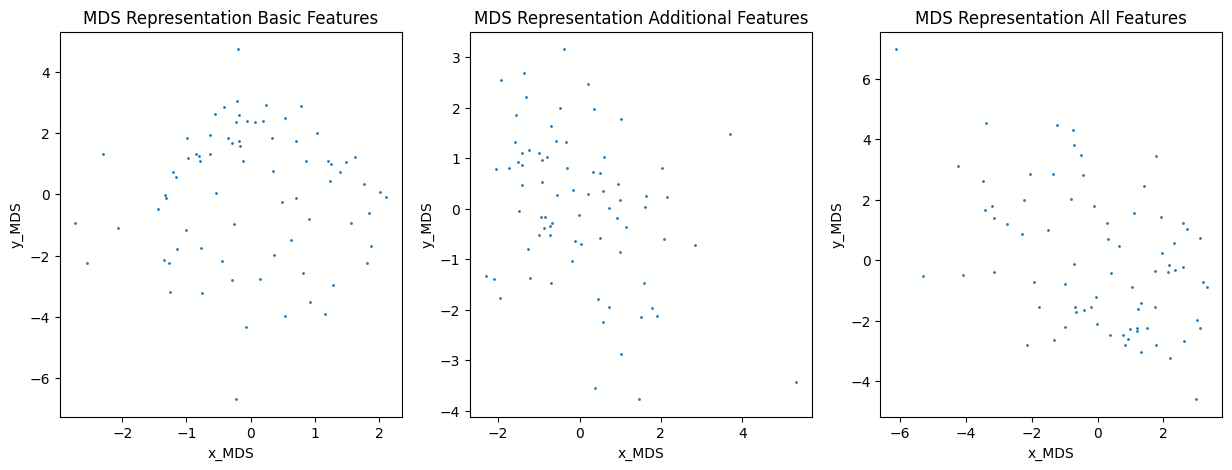

In [26]:
#plot the mds for all features and the rudia features
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(basic_features_mds['x_MDS'], basic_features_mds['y_MDS'], s=1)
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
ax2.scatter(additional_features_mds['x_MDS'], additional_features_mds['y_MDS'], s=1)
ax2.set_title('MDS Representation Additional Features')
ax2.set_xlabel('x_MDS')
ax2.set_ylabel('y_MDS')
ax3.scatter(all_features_mds['x_MDS'], all_features_mds['y_MDS'], s=1)
ax3.set_title('MDS Representation All Features')
ax3.set_xlabel('x_MDS')
ax3.set_ylabel('y_MDS')


#set scale to the same
ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
